ЗАДАЧА: 
- Мы работаем в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# 1. Общая информация о данных

In [1]:
import pandas as pd
# from pandas_profiling import ProfileReport
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt 
import datetime 
from datetime import datetime, date
import warnings
warnings.simplefilter('ignore')
import missingno as msno
from scipy import stats as st

pd.set_option('display.max_columns', 40) #макс кол-во колонок в выводимых данных 
pd.set_option('display.max_rows', 20) #макс кол-во строк в выводимых данных
pd.set_option('display.width', 80) #макс кол-во символов в строке

%matplotlib inline
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
try: 
    games=pd.read_csv('/datasets/games.csv')
except: 
    games=pd.read_csv('datasets/games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим пропуски в данных, названия столбцов в некорректном формате, неверные форматы данных и т.д. Перейдем к подготовке данных к анализу. 

# 2. Подготовка данных к анализу

### Замена названий столбцов

In [4]:
columns_list=games.columns.to_list()
for i in range (len(columns_list)): 
    columns_list[i]=columns_list[i].lower()
games.columns=columns_list
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование типов данных

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразуем типы данных: год выпуска (должен быть целочисленным) и user_score (должен быть float)

_year_of_release_

In [6]:
games.year_of_release.unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


In [9]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В дальнейшем нам предстоит заполнить пропуски в данных о дате выхода игры, которых, как мы видели ранее, немало. Возможно, часть данных получится взять из названия игры, где иногда указывается год выхода игры

_user_score_

In [10]:
games.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Рейтинг TBD означает To Be Determined, т.е. то, что он еще не определен. Информацию нам взять негде, поэтому заменим его на NaN

In [12]:
games['user_score'].replace({"tbd": str(np.NaN)}, inplace=True)
games['user_score']=games['user_score'].astype('float')

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


Мы превратили тип данных year в целочисленный, заменив NaN на 0 (будем пытаться минимизировать пропуски далее) и тип данных user_score во float, избавившись от строкового обозначения TBD, данные на замену которого нам взять негде. 

### Обработка пропусков

Убедимся в том, что нет дубликатов строк. 

In [14]:
games.duplicated().sum()

0

Посмотрим на пропуски в данных

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.3+ MB


<AxesSubplot:>

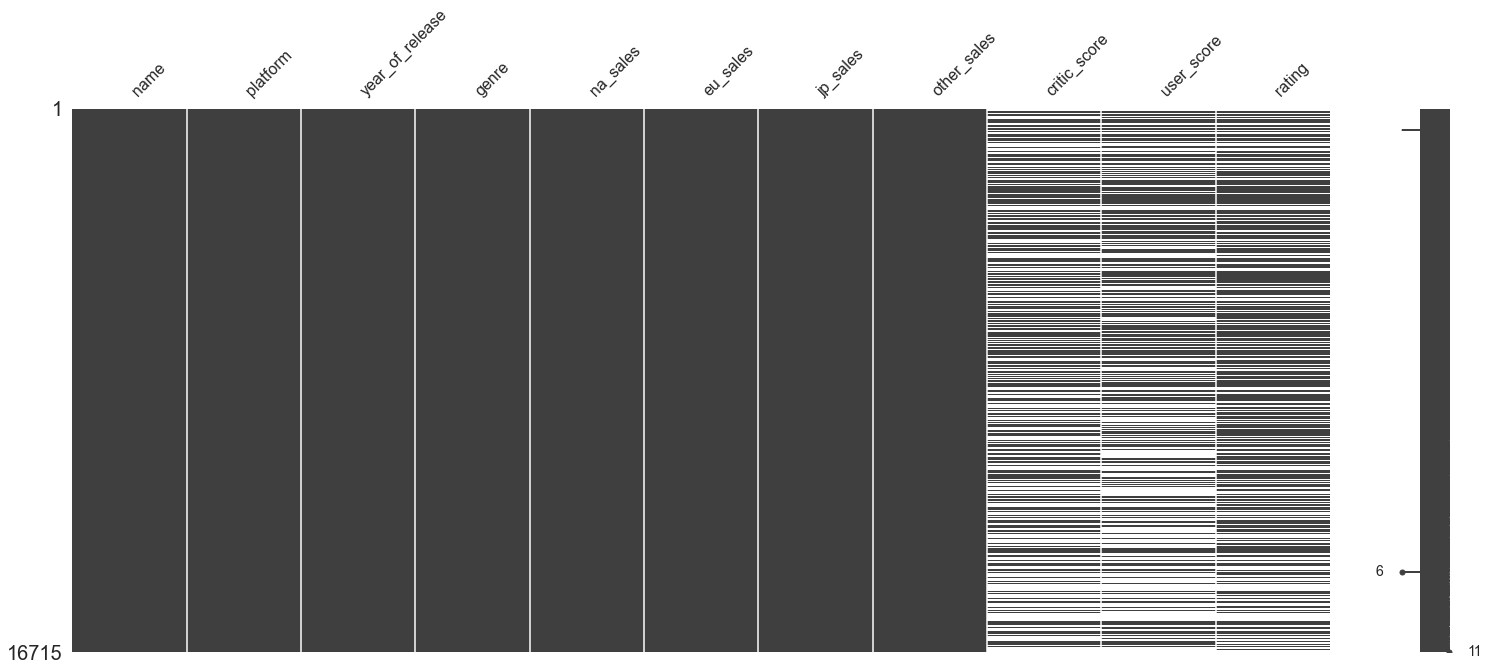

In [16]:
msno.matrix(games)

<AxesSubplot:>

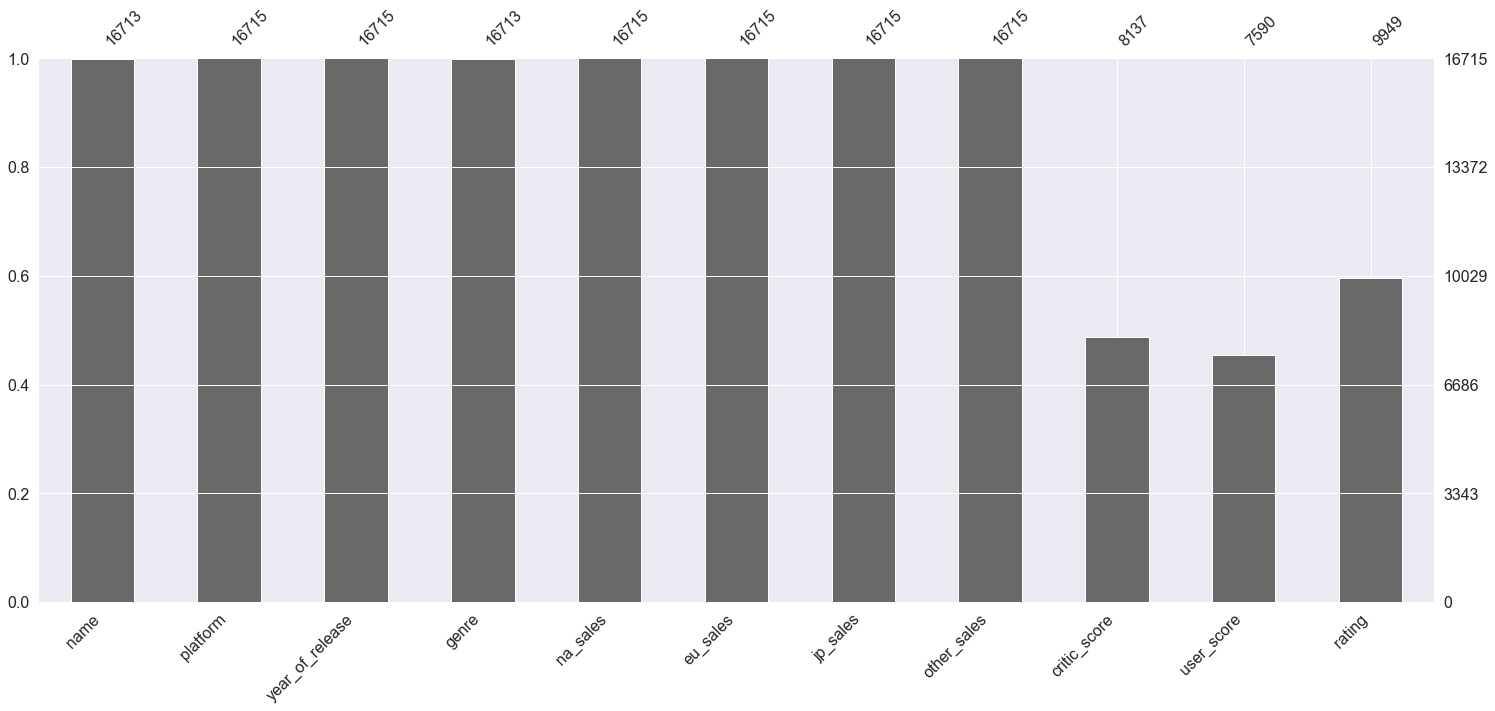

In [17]:
msno.bar(games)

Кроме пропусков в рейтингах, видим по два пропуска в жанрах и названиях, при этом помним, что несмотря на то, что формально у нас нет пропусков в данных с year_release, они всё же есть. К пропускам могли привести некорректное внесение данных в базу данных (например, для года релиза игры), непопулярность или редкость игры (для отсутствия данных в рейтинге). Возможно, игра слишком старая, сделана для неактуального ПО, поэтому данные на нее не заполнены. 

Удалим, если они есть, все строки в датафрейме, где ни одни данные не заполнены. 

In [18]:
games=games.dropna(how='all') 

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


Всё по-прежнему, поэтому рассмотрим все столбцы, в которых есть пропуски, по-отдельности: name, genre, year_of_release, critic_score, user_score, rating.

_Название игры - name_

In [20]:
games.name.value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [21]:
games.name.nunique()

11559

У нас всего 11559 разных названий игр, а данных гораздо больше. Посмотрим, например, Need for Speed: Most Wanted

In [22]:
games.query('name=="Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Видим, что это игры, выходившие на разных платформах в разные годы. 

В названиях игр есть также пропуски (также, как и в названиях жанра, это видно из описания пропусков выше)

In [23]:
games.loc[games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в названии игры и жанра совпадают, нет также данных ни о каком рейтинге. Продажи одной из игр вообще минимальны, и были только в Японии, вторая игра в Японии не продавалась, выпущены они были на одной и той же платформе в одном и том же году. Возможно, это одна и та же игра, только две разных ее версии (релиза) для разных рынков? Возможно, она была изменена для Японии потому, что что-либо в ней было неприемлемо из-за культурной разницы? Удалим эти данные, т.к. они бесполезны также с точки зрения исследования рейтинга. 

In [24]:
games.dropna(subset=['name'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


_Жанр - genre_

In [25]:
games.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Теперь и жанр не содержит пропусков. Посмотрим, сколько игр какого жанра. 

In [26]:
games.genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

_Платформы - platform_

In [27]:
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Опечаток не найдено

_Год выхода игры - year_of_release_

In [28]:
games.year_of_release.value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
        ... 
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, Length: 38, dtype: int64

In [29]:
games.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 строк не имеют данных в year_of_release. Однако, мы видим, что в названии игры иногда содержится год ее выхода. Извлечем эти данные оттуда и посмотрим, насколько это сможет минимизировать пропуски. 

In [30]:
games['add_year'] = games['name'].str.extract(pat = '([1-9][0-9][0-9][0-9])')

In [31]:
games.add_year.value_counts()

2002    79
2010    67
2000    67
2004    61
2005    52
        ..
1080     1
2048     1
1886     1
2070     1
3000     1
Name: add_year, Length: 47, dtype: int64

In [32]:
games['add_year'].unique()

array([nan, '2015', '2004', '2100', '2005', '2007', '2003', '2012',
       '2008', '2014', '2002', '2006', '2009', '2013', '2011', '2010',
       '2000', '1080', '2001', '1886', '2016', '2070', '2600', '1500',
       '1942', '1999', '2033', '1000', '2017', '2048', '2025', '1001',
       '1701', '2205', '2020', '2049', '1692', '1945', '1969', '1996',
       '1800', '2089', '1946', '2500', '1450', '2142', '1943', '3000'],
      dtype=object)

Мы извлекли 47 разных видов данных, но нам подходят только те, что не раньше, например, 1970 года и не позже 2016. 

In [33]:
games['add_year']=games['add_year'].fillna(0)
games['add_year']=games['add_year'].astype('int')
games.loc[(games['add_year']<1970) | (games['add_year']>2016)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,1000
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0


In [34]:
def year_function(a): 
    if 1970 < a < 2016: 
        return a
    else: 
        return 0

In [35]:
games['add_year']=games['add_year'].apply(year_function)
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,2007
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0


In [36]:
games.add_year.unique()

array([   0, 2015, 2004, 2005, 2007, 2003, 2012, 2008, 2014, 2002, 2006,
       2009, 2013, 2011, 2010, 2000, 2001, 1999, 1996], dtype=int64)

У нас остались только те годы, которые удовлетворяют логическому условию. Найдем перечень индексов для игр, данные для которых найдены в add_year, чтобы внести их в year_of_release.

In [37]:
df_to_replace=games.loc[(games['year_of_release'] == 0) & (games['year_of_release'] != games['add_year'])]
df_to_replace

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
1650,NASCAR Thunder 2003,PS2,0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2003
2572,PES 2009: Pro Evolution Soccer,PSP,0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2009
3486,Madden NFL 2002,XB,0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2002
4775,NFL GameDay 2003,PS2,0,Sports,0.20,0.15,0.00,0.05,60.0,NaN,E,2003
5156,NBA Live 2003,XB,0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2003
5336,Tomb Raider (2013),PC,0,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2013
5655,All-Star Baseball 2005,PS2,0,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,2005


In [38]:
games.loc[df_to_replace.index, 'year_of_release']=df_to_replace['add_year']

In [39]:
games.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,0
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,0
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,0
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,0
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0


Мы заменили все найденные года выхода игр, которые нам удалось извлечь из их названий и которые подходят по смыслу. 252 строки остались без года выхода игры. Просмотрим названия визуально на тот предмет, что мы могли упустить год игры, заключенный в ее названии.

In [40]:
games.loc[games['year_of_release'] == 0]['name'].unique()

array(['LEGO Batman: The Videogame', 'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'Hitman 2: Silent Assassin',
       'Legacy of Kain: Soul Reaver', 'Donkey Kong Land III',
       'Air-Sea Battle', 'Suikoden III', 'Wheel of Fortune', 'Yakuza 4',
       'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'WarioWare: Twisted!', 'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advance Wars: Days of Ruin', 'The Golden Compass',
       'Madden NFL 06', 'NASCAR: Dirt to Daytona',
       'Def Jam: Fight for NY', 'NBA Street Vol. 2'

Таких названий не нашлось. 

Сделаем список названий игр, у которых год выпуска так и не определен. 

In [41]:
zero_year_game_name_list=games.loc[games['year_of_release'] == 0]['name'].drop_duplicates().tolist()
print('Таких игр', len(zero_year_game_name_list))

Таких игр 218


Сделаем список названий игр, у которых есть год выпуска. 

In [42]:
not_zero_year_game_name_list=games.loc[games['year_of_release'] != 0]['name'].drop_duplicates().tolist()
print('Таких игр', len(not_zero_year_game_name_list))

Таких игр 11432


In [43]:
list2=[]
for name in zero_year_game_name_list: 
    if name in not_zero_year_game_name_list: 
        list2.append(name)
print('Игр, которые входят одновременно в оба списка, т.е. имеет в других строках данные о годе выпуска: ', len(list2))

Игр, которые входят одновременно в оба списка, т.е. имеет в других строках данные о годе выпуска:  91


Как это выглядит?

In [44]:
games.query('name in @list2').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year
4800,AKB1/48: Idol to Guam de Koishitara...,PSP,2011,Misc,0.00,0.00,0.40,0.00,NaN,NaN,NaN,0
16293,AKB1/48: Idol to Guam de Koishitara...,X360,0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16157,Aquaman: Battle for Atlantis,XB,0,Action,0.01,0.00,0.00,0.00,26.0,2.7,T,0
16353,Aquaman: Battle for Atlantis,GC,2003,Action,0.01,0.00,0.00,0.00,27.0,3.1,T,0
13609,Battle vs. Chess,PS3,0,Misc,0.00,0.03,0.00,0.01,NaN,NaN,T,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6670,Wheel of Fortune,N64,1997,Misc,0.20,0.05,0.00,0.00,NaN,NaN,NaN,0
15816,Without Warning,XB,0,Shooter,0.01,0.00,0.00,0.00,45.0,2.0,M,0
14052,Without Warning,PS2,2005,Shooter,0.02,0.01,0.00,0.00,45.0,6.5,M,0
6077,World of Tanks,PC,2011,Shooter,0.00,0.23,0.00,0.05,80.0,3.7,T,0


Мы видим, что одни и те же игры выходят на разных платформах, и для одной из платформ год выхода не указан, а для другой указан. Поскольку досконально точно нам год выхода данной игры на данной платформе можно проверить только вручную, а это очень большой список, имеет смысл заменить неизвестный нам год выпуска на известный год выпуска этой же игры на другой платформе. Если существенные расхождения будут, то их будет очень немного, ведь одна и та же игра, чаще всего, выходит на разных платформах в течение не такого длительного времени, и скорее всего, это один и тот же год. 

In [45]:
name_year_set=games[['name', 'year_of_release']]
name_year_set

,name,year_of_release
0,Wii Sports,2006
1,Super Mario Bros.,1985
2,Mario Kart Wii,2008
3,Wii Sports Resort,2009
4,Pokemon Red/Pokemon Blue,1996
...,...,...
16710,Samurai Warriors: Sanada Maru,2016
16711,LMA Manager 2007,2006
16712,Haitaka no Psychedelica,2016
16713,Spirits & Spells,2003


In [46]:
name_year_set=name_year_set.drop_duplicates().sort_values('year_of_release', ascending=False).drop_duplicates('name').sort_index()
name_year_set

,name,year_of_release
0,Wii Sports,2006
2,Mario Kart Wii,2008
3,Wii Sports Resort,2009
4,Pokemon Red/Pokemon Blue,1996
5,Tetris,1989
...,...,...
16706,Men in Black II: Alien Escape,2003
16707,Aiyoku no Eustia,2014
16708,Woody Woodpecker in Crazy Castle 5,2002
16711,LMA Manager 2007,2006


In [47]:
name_year_set.name.value_counts()

Wii Sports                          1
Ogre Battle Series: Tactics Ogre    1
Earth Defense Force 2017            1
Boxing Fever                        1
The $1 Pyramid                      1
                                   ..
Shrek Swamp Kart Speedway           1
Gameboy Gallery                     1
Contra 4                            1
Virtua Cop 2                        1
Haitaka no Psychedelica             1
Name: name, Length: 11559, dtype: int64

У нас есть список названий игр и соответствующих им годов выпуска без дубликатов строк и дубликатов названий

In [48]:
year_to_find=games.query('year_of_release == 0')

year_to_find

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,0
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,0
627,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,0
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,0
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0


In [49]:
index_to_change=year_to_find.index
index_to_change

Int64Index([  456,   609,   627,   657,   678,   719,   805,  1131,  1142,
             1301,
            ...
            16180, 16277, 16288, 16293, 16329, 16348, 16405, 16448, 16458,
            16522],
           dtype='int64', length=252)

In [50]:
merged=year_to_find.merge(name_year_set, how='inner', on='name')
merged.index=index_to_change
merged

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year,year_of_release_y
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,0,2008
609,LEGO Batman: The Videogame,PSP,0,Action,0.57,0.44,0.00,0.27,73.0,7.4,E10+,0,2008
627,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,0,2002
657,Rock Band,X360,0,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,0,0
678,Rock Band,Wii,0,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16348,Brothers in Arms: Furious 4,X360,0,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,M,0,2012
16405,Agarest Senki: Re-appearance,PS3,0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0,0
16448,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0,2003
16458,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0,2012


In [51]:
games.loc[merged.index, 'year_of_release']=merged['year_of_release_y']

In [52]:
games.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,add_year
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E,0
678,LEGO Indiana Jones: The Original Adventures,Wii,0,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,0
719,Call of Duty 3,Wii,0,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,0
805,Rock Band,Wii,0,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,0
1131,Call of Duty: Black Ops,PC,0,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16180,WRC: FIA World Rally Championship,PC,0,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP,0
16288,Shorts,DS,0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+,0
16293,AKB1/48: Idol to Guam de Koishitara...,X360,0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0


У нас осталось 139 строк, у которых не удалось никаким образом обнаружить год выпуска, до начала работы с пропусками было почти в два раза больше. 

In [53]:
del games['add_year']

In [54]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.0+ MB


In [55]:
games['total_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<AxesSubplot:>

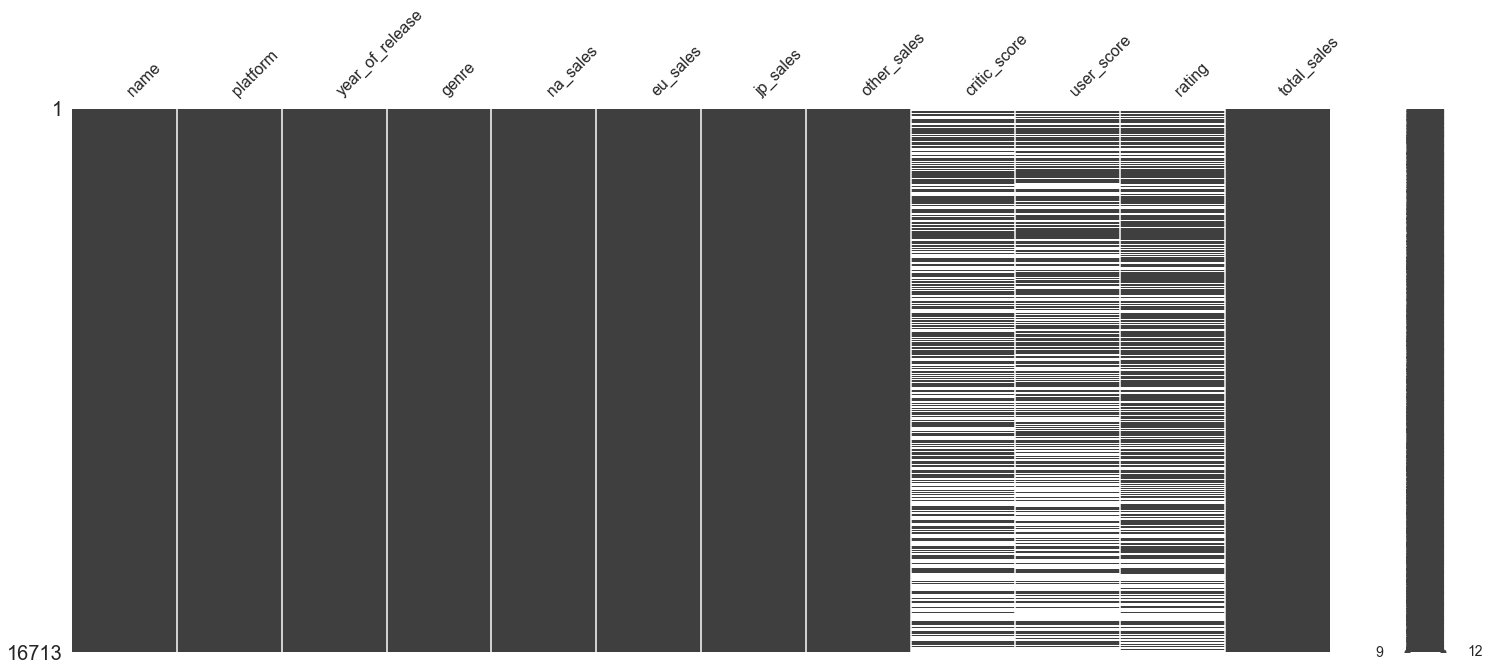

In [56]:
msno.matrix(games)

<AxesSubplot:>

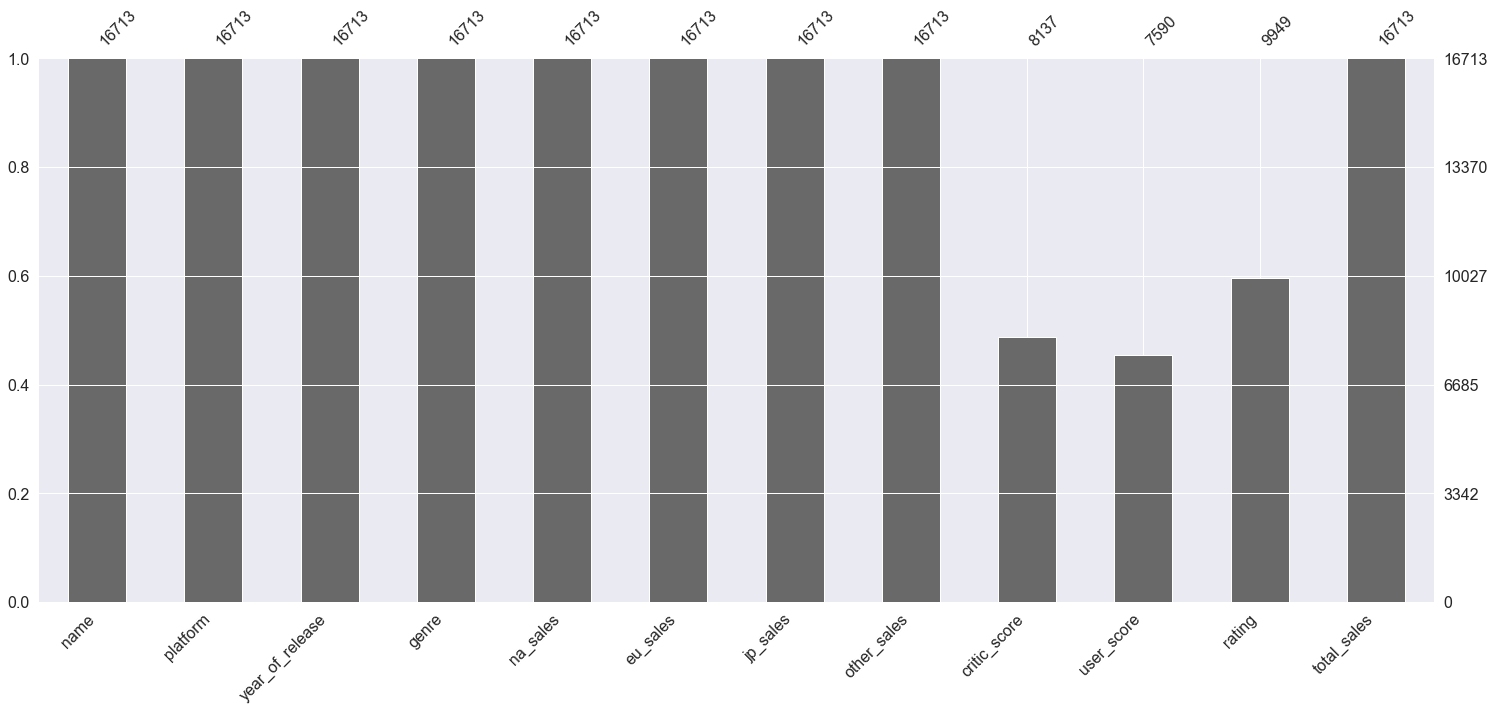

In [57]:
msno.bar(games)

In [58]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


_Рейтинг - rating_

In [59]:
games.rating.isna().sum()

6764

Технически мы могли бы попытаться также, как и пропуски в годах, заменить пропуски в rating, подтянув данные с других платформ. Посмотрим, насколько нам это поможет. Сейчас у нас 6764 строки не имеют rating. 

Поскольку мы решили, что такой способ скорее исказит данные, чем улучшит их, то заполнять их не станем (а если и стали бы, то это удалось бы всего для 184 строк).

Взглянем, какие значения в этом столбце вообще есть. 

In [60]:
games.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

K-A - это "for Kids to Adults" (от детей до взрослых), в 1998 был заменен на E, в этой таблице мы рассматриваем все игры, не только вышедшие после 1998 года, поэтому это значение есть, в более актуальных данных его не будет. Расшифровка остального рейтинга: 
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older»)
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»

Заменим пропуски на другую категориальную переменную: UNDEFINED (UN) и посмотрим, провится ли она в исследованиях рейтингов позже.

In [61]:
games.rating=games.rating.fillna('UN')
games.rating.unique()

array(['E', 'UN', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

_Отзывы критиков - critic_score_

In [62]:
games.critic_score.isna().sum()

8576

In [63]:
games.critic_score=games.critic_score.fillna(-1)

_Пользовательский рейтинг - user_score_

In [64]:
games.user_score.isna().sum()

9123

In [65]:
games.user_score=games.user_score.fillna(-1)

<AxesSubplot:>

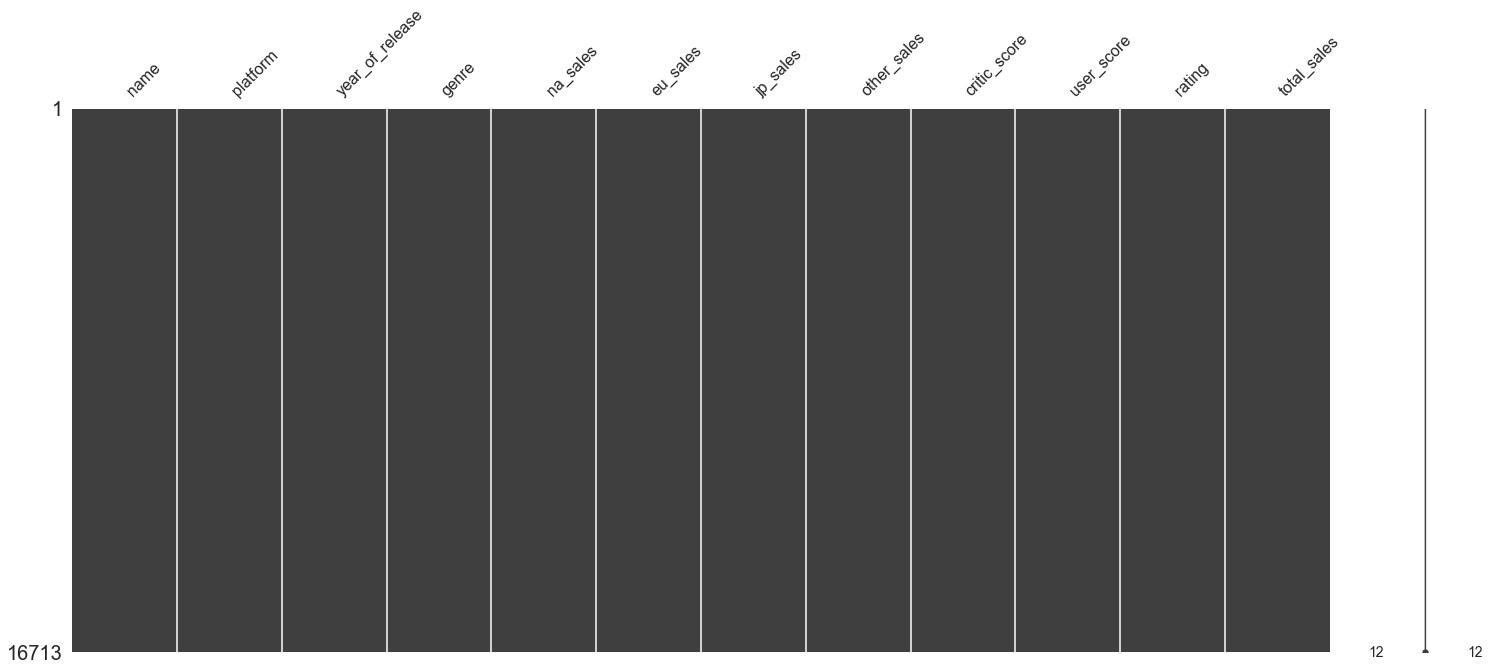

In [66]:
msno.matrix(games)

<AxesSubplot:>

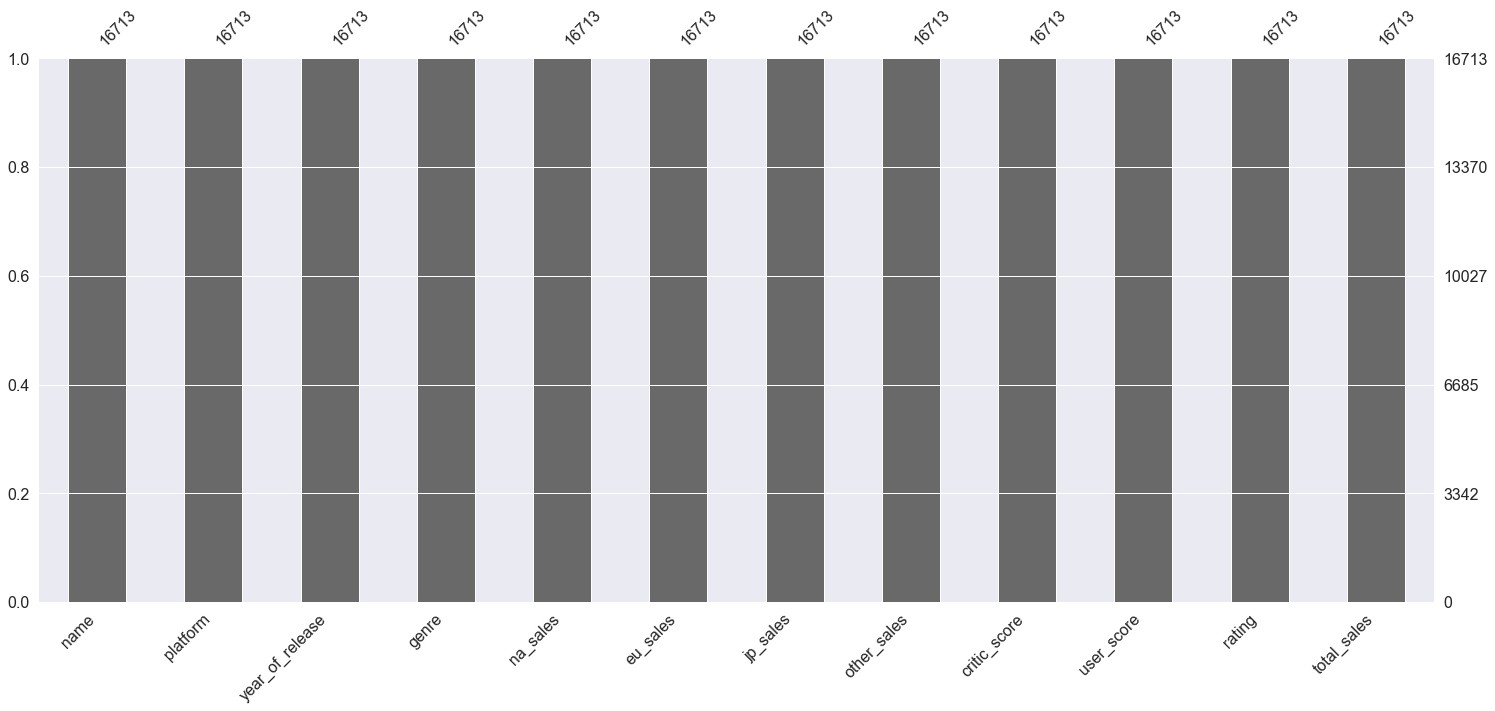

In [67]:
msno.bar(games)

Приступим к исследованию данных в соответствии с поставленными нами задачами. Базовые данные для анализа обработаны и содержатся в датафрейме games.

In [68]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.2+ MB


# Исследовательский анализ данных 

## Выпуск игр по годам

Посмотрим, сколько игр выпускалось в разные годы.

In [69]:
qty_per_year_table=games.loc[games['year_of_release'] != 0].pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='year_of_release', ascending=False)
qty_per_year_table.head(10)

,name
year_of_release,
2016,502
2015,606
2014,581
2013,548
2012,662
2011,1154
2010,1271
2009,1431
2008,1440


<function matplotlib.pyplot.show(close=None, block=None)>

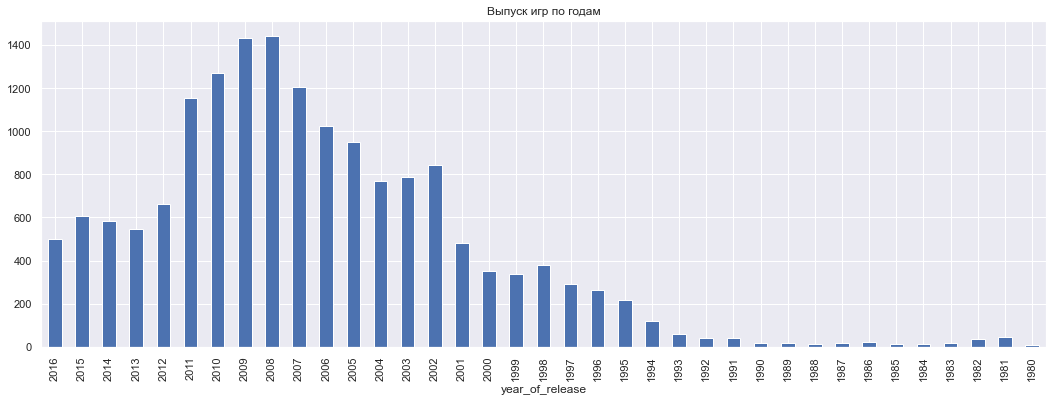

In [70]:
qty_per_year_table.name.plot(kind='bar', y='name', x='year_of_release', figsize=(18, 6))
plt.title('Выпуск игр по годам')
plt.show

Мы видим, что даже с учетом не взятых в расчет 139 игр (менее 1% данных), нам удалось увидеть закономерности: начиная с 1990 г. выпуск видеоигр растет, существенный рост начинается с 2001 г., пик приходится на 2008-2009 гг., далее количество выпущенных игр падает, возможно, в связи с мировым экономическим кризисом, и постепенный прирост начинается с 2013 года. Данные за 2016 г., как сказано в описании наших данных, могут быть неполными, поэтому не могут характеризовать провал по количеству в 2016 г.

## Продажи по платформам

Как изменяются продажи по годам по всем платформам, которые есть в нашем датасете?

In [71]:
games_sales_pivot=games.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').reset_index()
games_sales_pivot=games_sales_pivot.loc[games_sales_pivot['year_of_release']!=0].sort_values(by='year_of_release', ascending=True)
games_sales_pivot.head(10)

,year_of_release,total_sales
1,1980,11.38
2,1981,35.68
3,1982,28.88
4,1983,16.80
5,1984,50.35
6,1985,53.95
7,1986,37.08
8,1987,21.70
9,1988,47.21
10,1989,73.45


<function matplotlib.pyplot.show(close=None, block=None)>

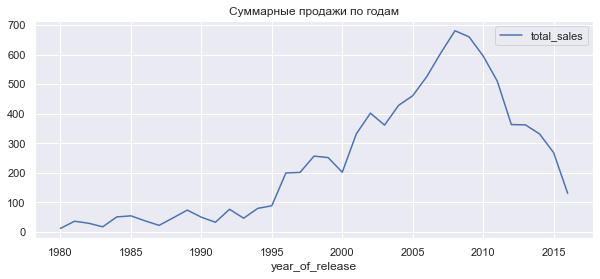

In [72]:
games_sales_pivot.plot(y='total_sales', x='year_of_release', figsize=(10, 4))
plt.title('Суммарные продажи по годам')
plt.show

Видим, что не только игр выходит меньше, но и продажи падают, начиная с 2008 г. 

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Выясним, за какой характерный срок появляются новые и исчезают старые платформы.

In [73]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [74]:
games['platform'].nunique()

31

В данных у нас 31 различная платформа

In [75]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,UN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,UN,31.38


In [76]:
platform_sales_table=games.groupby('platform', as_index=False)['total_sales'].agg(np.sum).sort_values(by='total_sales', ascending=False)
platform_sales_table.head(10)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [77]:
platform_sales_table.platform.to_list()

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'GBA',
 'PS4',
 'PSP',
 'PC',
 '3DS',
 'XB',
 'GB',
 'NES',
 'N64',
 'SNES',
 'GC',
 'XOne',
 '2600',
 'WiiU',
 'PSV',
 'SAT',
 'GEN',
 'DC',
 'SCD',
 'NG',
 'WS',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

<function matplotlib.pyplot.show(close=None, block=None)>

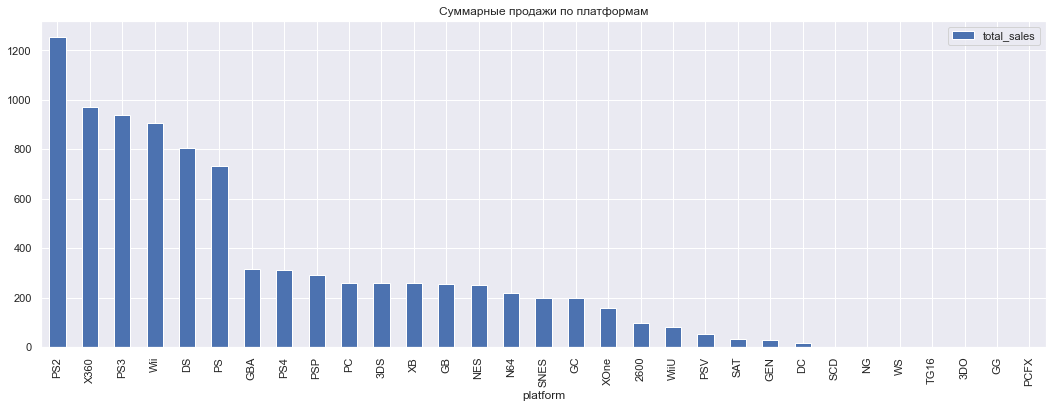

In [78]:
platform_sales_table.plot(kind='bar', y='total_sales', x='platform', figsize=(18, 6))
plt.title('Суммарные продажи по платформам')
plt.show

Мы видим, что первые 6 платформ показывают значительно бОльшие продажи, чем другие. Рассмотрим их отдельно. 

In [79]:
top_6_platforms=platform_sales_table.head(6)
top_6_platforms_list=top_6_platforms.platform.to_list()
top_6_platforms_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [80]:
data_top_6_platforms=games.query('platform in @top_6_platforms_list')
platforms_6=data_top_6_platforms[['platform', 'year_of_release', 'total_sales']]
platforms_6

,platform,year_of_release,total_sales
0,Wii,2006,82.54
2,Wii,2008,35.52
3,Wii,2009,32.77
6,DS,2006,29.80
7,Wii,2006,28.91
...,...,...,...
16700,DS,2009,0.01
16704,DS,2008,0.01
16709,PS2,2008,0.00
16710,PS3,2016,0.01


In [81]:
platforms_6_grouped=platforms_6.loc[platforms_6['year_of_release'] != 0].groupby(['platform', 'year_of_release'], as_index=False).agg(np.sum)
platforms_6_grouped=platforms_6_grouped.sort_values(by=['platform', 'year_of_release'])
platforms_6_grouped

,platform,year_of_release,total_sales
0,DS,1985,0.02
1,DS,2002,0.25
2,DS,2003,0.05
3,DS,2004,17.27
4,DS,2005,130.16
...,...,...,...
76,X360,2012,100.71
77,X360,2013,88.76
78,X360,2014,34.74
79,X360,2015,11.96


<function matplotlib.pyplot.show(close=None, block=None)>

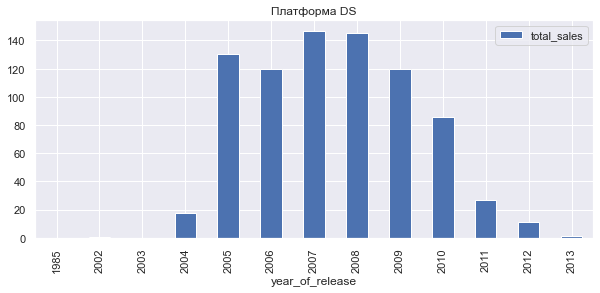

In [82]:
platforms_6_grouped.loc[platforms_6_grouped['platform']=="DS"].plot(kind='bar', y='total_sales', x='year_of_release', figsize=(10, 4))
plt.title('Платформа DS')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

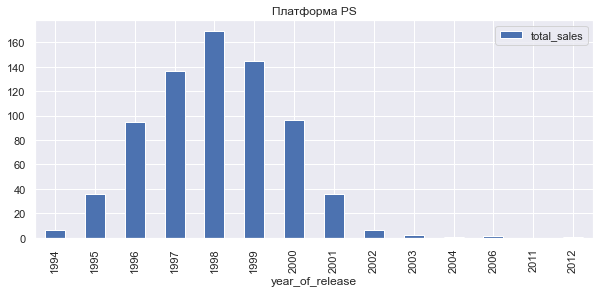

In [83]:
platforms_6_grouped.loc[platforms_6_grouped['platform']=="PS"].plot(kind='bar', y='total_sales', x='year_of_release', figsize=(10, 4))
plt.title('Платформа PS')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

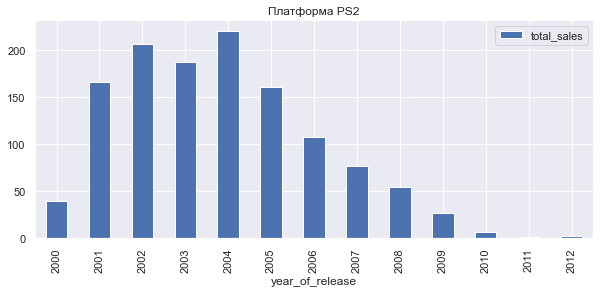

In [84]:
platforms_6_grouped.loc[platforms_6_grouped['platform']=="PS2"].plot(kind='bar', y='total_sales', x='year_of_release', figsize=(10, 4))
plt.title('Платформа PS2')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

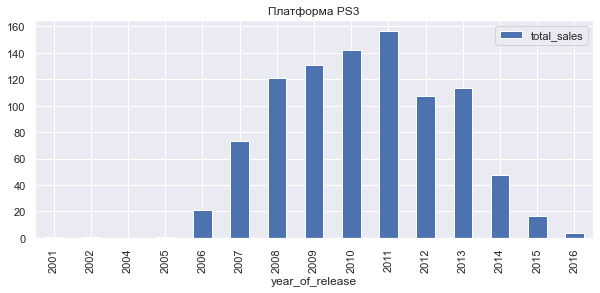

In [85]:
platforms_6_grouped.loc[platforms_6_grouped['platform']=="PS3"].plot(kind='bar', y='total_sales', x='year_of_release', figsize=(10, 4))
plt.title('Платформа PS3')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

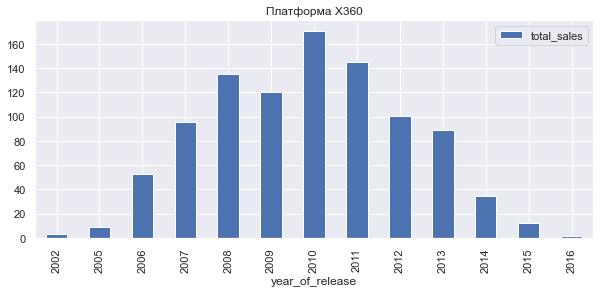

In [86]:
platforms_6_grouped.loc[platforms_6_grouped['platform']=="X360"].plot(kind='bar', y='total_sales', x='year_of_release', figsize=(10, 4))
plt.title('Платформа X360')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

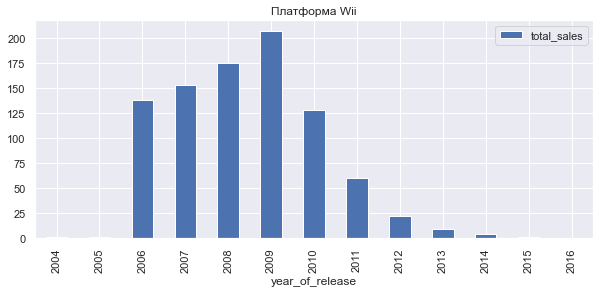

In [87]:
platforms_6_grouped.loc[platforms_6_grouped['platform']=="Wii"].plot(kind='bar', y='total_sales', x='year_of_release', figsize=(10, 4))
plt.title('Платформа Wii')
plt.show

Платформы PS, PS2, PS3 идут друг за другом, "подхватывая" продажи друг у друга, но и они, и другие три платформы, показывают схожую закономерность: с началом продаж идут 5-6 лет максимальных продаж, затем - затухание продаж, потеря популярности платформы. 

Исходя из этого вывода, возьмем период в размере 5-6 лет (учитывая, что данные в 2016 году могут быть неполными, возьмем 2011, 2012, 2013, 2014, 2015 и 2016 года) и проанализируем их для построения прогноза на 2017 год. Отсеем неактуальные данные из таблицы games, с которой мы работали ранее. Данные за предыдущие годы больше учитывать не будем. 

In [88]:
new_games=games.loc[games['year_of_release']>=2011]
new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,UN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,UN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01


## Актуальный анализ платформ (2011-2016 гг)

Посмотрим, какие платформы лидируют по продажам, какие растут или падают, и выберем несколько потенциально прибыльных платформ.

In [89]:
new_games.platform.value_counts()

PS3     710
3DS     512
X360    505
PSV     429
PC      392
PS4     392
PSP     312
XOne    247
Wii     198
DS      190
WiiU    147
PS2       9
XB        3
PS        2
GBA       2
GB        1
2600      1
GC        1
Name: platform, dtype: int64

Удалим платформы с единичными продажами, чтобы не раздувать таблицы. 

In [90]:
modern_list= ['PS3', '3DS', 'X360', 'PSV', 'PC', 'PS4', 'PSP', 'XOne', 'Wii', 'DS', 'WiiU']

In [91]:
new_games=new_games.query('platform in @modern_list')
new_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,UN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,UN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01


<AxesSubplot:xlabel='year_of_release'>

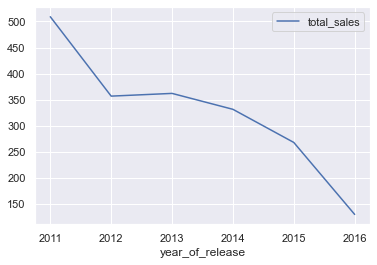

In [92]:
new_games_years=new_games.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
new_games_years.plot()

Продажи отделенных нами платформ с наибольшими продажами падают на протяжении рассматриваемого периода. 

In [93]:
new_games_grouped_total=new_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
new_games_grouped_total

,total_sales
platform,
PS3,445.59
X360,382.81
PS4,314.14
3DS,257.81
XOne,159.32
PC,98.29
Wii,95.25
WiiU,82.19
PSV,53.81


array([<AxesSubplot:ylabel='total_sales'>], dtype=object)

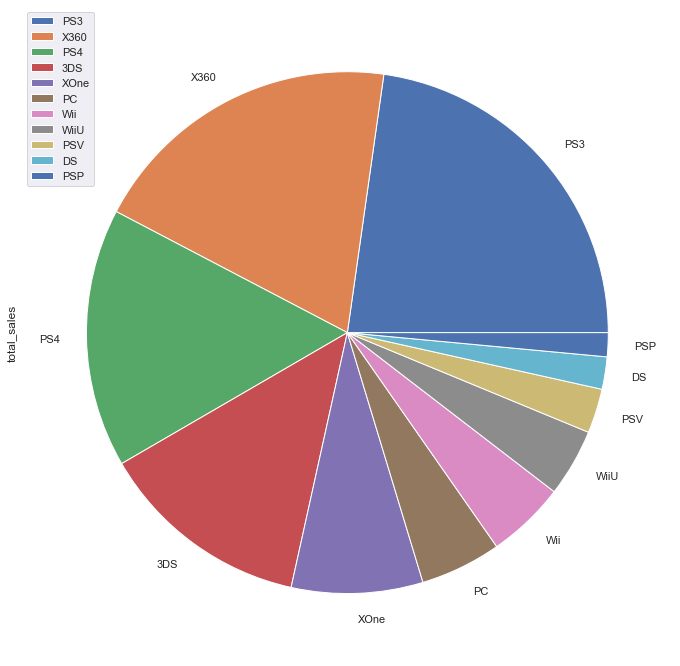

In [94]:
new_games_grouped_total.plot(kind='pie', subplots=True, figsize=(12, 12))

Очевидно, что по итогам 2011-2016 гг. 5 платформ занимают более 3/4 всех продаж, но каждая ли из них на протяжении всего этого периода показывает только рост?

In [95]:
new_games_grouped=new_games.groupby(
    ['platform', 'year_of_release'], 
    as_index=False
).agg(np.sum).sort_values(by=['platform', 'year_of_release'])
new_games_grouped.head()

,platform,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
0,3DS,2011,27.34,18.63,12.83,4.40,3833.0,310.9,63.20
1,3DS,2012,17.11,11.68,19.98,2.59,2349.0,184.7,51.36
2,3DS,2013,15.56,14.84,23.57,2.60,1263.0,99.5,56.57
3,3DS,2014,12.33,8.73,20.69,2.01,1390.0,87.0,43.76
4,3DS,2015,6.17,5.06,15.52,1.03,1284.0,94.2,27.78


Построим графики распределения продаж по годам выхода новых игр. 

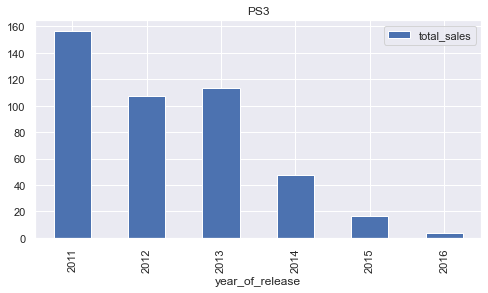

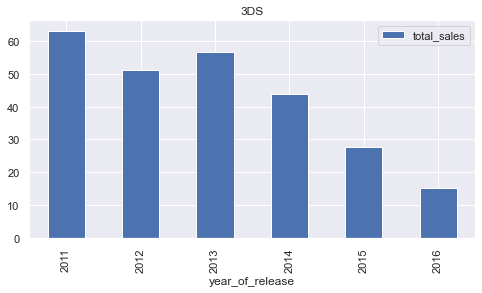

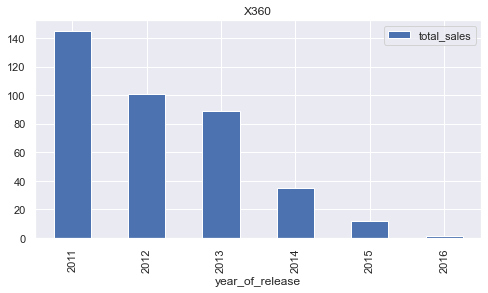

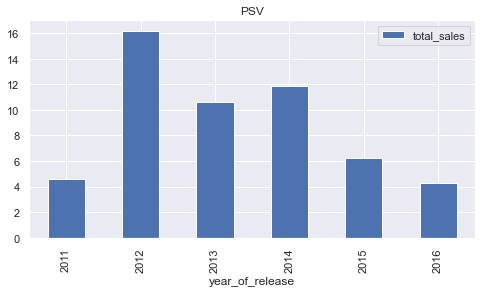

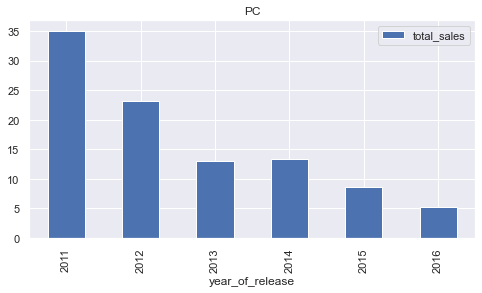

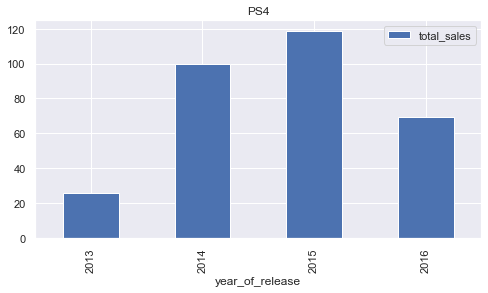

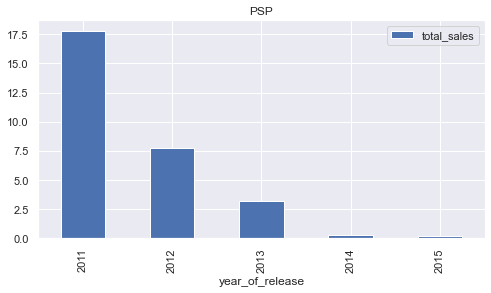

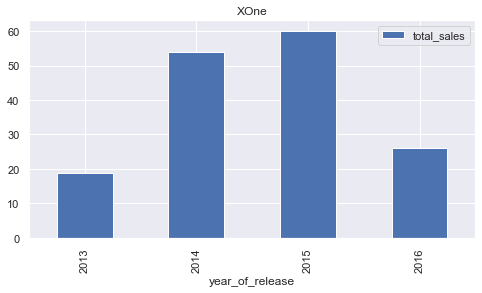

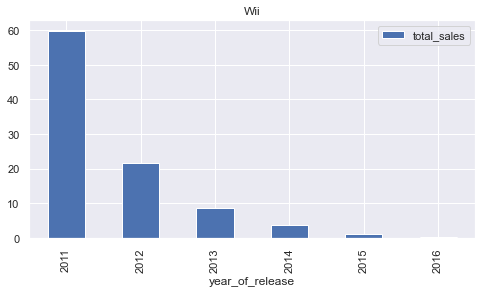

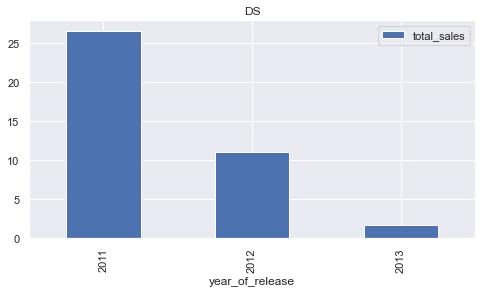

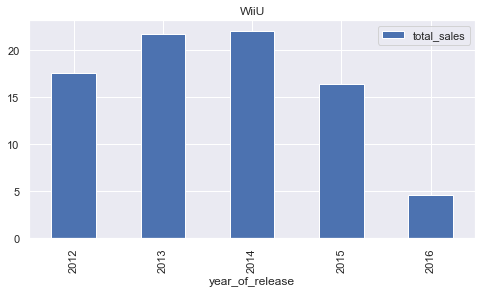

In [96]:
for p in range (len(modern_list)): 
    n = modern_list[p]
    new_games_grouped.loc[new_games_grouped['platform'] == n].plot(kind='bar', x='year_of_release', y='total_sales', figsize=(8, 4))
    plt.title(n)
    plt.show

На графиках видно, что только XOne и PS4 не показывают стабильного падения на протяжении рассматриваемого периода времени (данные за 2016 год неполные, поэтому не считаем показатель в 2016 году за падение). 

Мы видим, что по нашим данным, все продажи за актуальный период падают, падают продажи платформ-лидеров, остальные платформы имеют за этот период единичные продажи, поэтому очевидно, что среди них нет "звёзд", которые показывают сейчас небольшие, но в то же время существенно прирастающие продажи, и которые в этом случае были бы потенциально интересны с точки зрения работы с ними и требовали бы дополнительного исследования. 

## Распределение продаж в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам и опишем результат.

In [97]:
new_games_pivot=new_games.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
new_games_pivot=new_games_pivot.loc[new_games_pivot['year_of_release'] != 0].sort_values(by=['platform', 'year_of_release'])
new_games_pivot.head(10)

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
5,3DS,2016,15.14
6,DS,2011,26.59
7,DS,2012,11.01
8,DS,2013,1.61
9,PC,2011,35.07


Посмотрим на ящик с усами, а также на дисперсию и стандартное отклонение. Поскольку у нас выборка, то мы используем формулу для оценки дисперсии генеральной совокупности по выборке. Напишем функцию и применим ее далее ко всем нужным данным. 

In [98]:
def boxplot_dis (x, y, z): 
    variance_estimate = np.var(x, ddof=1)
    standard_deviation = np.std(x)
    print ('Минимальное значение равно: {:.2f}'.format(x.min()))
    print ('Среднее значение равно: {:.2f}'.format(x.mean()))
    print ('Максимальное значение равно: {:.2f}'.format(x.max()))
    
    print ('Дисперсия равна: {:.2f}'.format(variance_estimate))
    print ('Стандартное отклонение равно: {:.2f}'.format(standard_deviation))


    if (x.max()-x.mean()) < (3*standard_deviation):
        print ('Разница между максимальным значением и средним не превышает 3 стандартных отклонений')
    else: 
        print ('Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.')
    
    if (x.mean()-x.min()) < (3*standard_deviation): 
        print ('Разница между минимальным значением и средним не превышает 3 стандартных отклонений')
    else: 
        print ('Разница между минимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в меньшую сторону.')
    z.boxplot(column=y, figsize=(10, 10))
    plt.title(y)
    plt.show()

Минимальное значение равно: 0.12
Среднее значение равно: 34.34
Максимальное значение равно: 156.78
Дисперсия равна: 1506.93
Стандартное отклонение равно: 38.48
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


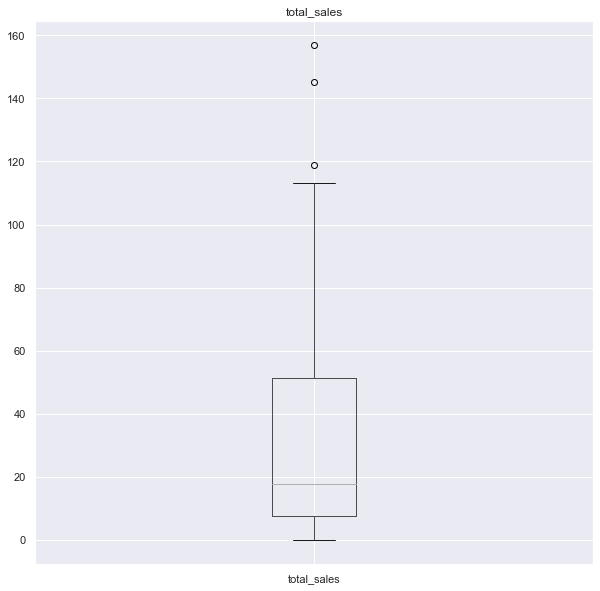

In [99]:
boxplot_dis(new_games_pivot.total_sales, 'total_sales', new_games_pivot)

In [100]:
platform_list=new_games_pivot.platform.drop_duplicates().to_list()
platform_list

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

Размах продаж (total_sales) по платформе 3DS:
Минимальное значение равно: 15.14
Среднее значение равно: 42.97
Максимальное значение равно: 63.20
Дисперсия равна: 334.09
Стандартное отклонение равно: 16.69
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


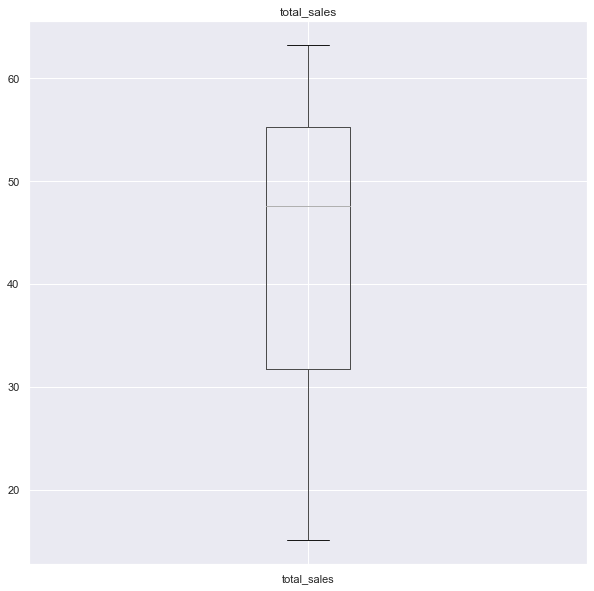



Размах продаж (total_sales) по платформе DS:
Минимальное значение равно: 1.61
Среднее значение равно: 13.07
Максимальное значение равно: 26.59
Дисперсия равна: 159.18
Стандартное отклонение равно: 10.30
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


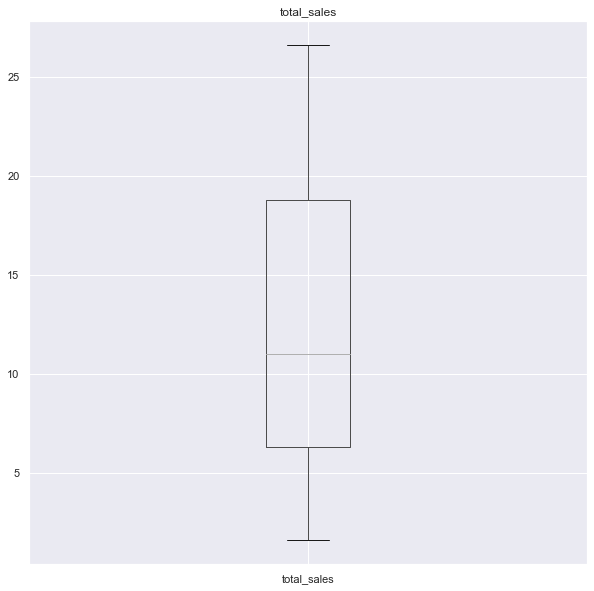



Размах продаж (total_sales) по платформе PC:
Минимальное значение равно: 5.25
Среднее значение равно: 16.38
Максимальное значение равно: 35.07
Дисперсия равна: 120.63
Стандартное отклонение равно: 10.03
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


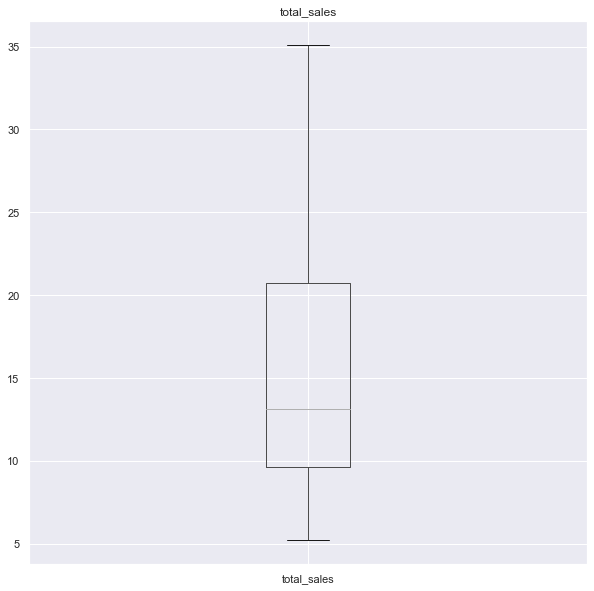



Размах продаж (total_sales) по платформе PS3:
Минимальное значение равно: 3.60
Среднее значение равно: 74.27
Максимальное значение равно: 156.78
Дисперсия равна: 3684.23
Стандартное отклонение равно: 55.41
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


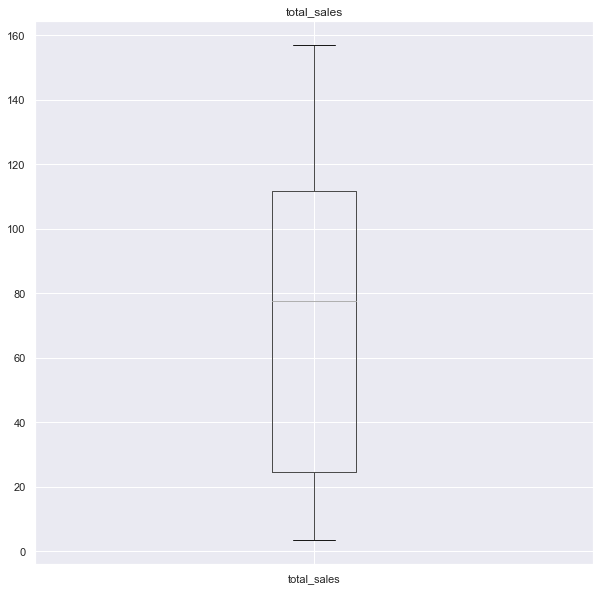



Размах продаж (total_sales) по платформе PS4:
Минимальное значение равно: 25.99
Среднее значение равно: 78.53
Максимальное значение равно: 118.90
Дисперсия равна: 1645.76
Стандартное отклонение равно: 35.13
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


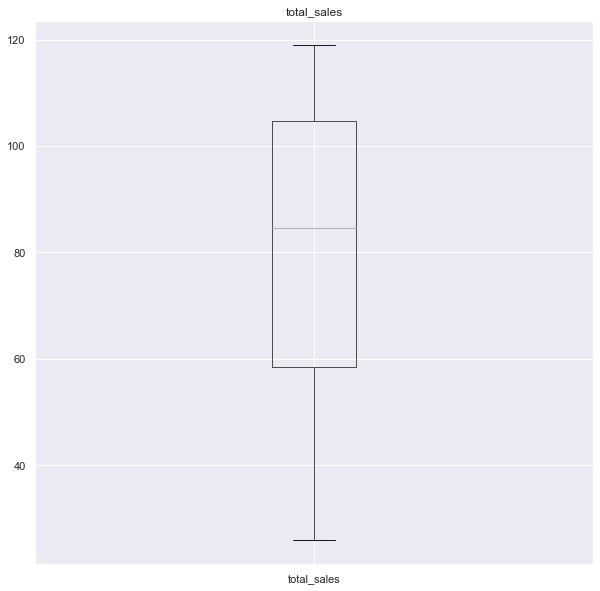



Размах продаж (total_sales) по платформе PSP:
Минимальное значение равно: 0.12
Среднее значение равно: 5.80
Максимальное значение равно: 17.82
Дисперсия равна: 54.58
Стандартное отклонение равно: 6.61
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


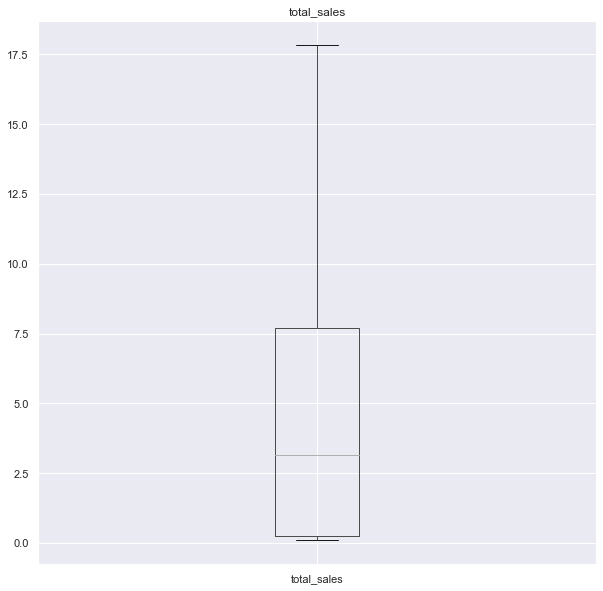



Размах продаж (total_sales) по платформе PSV:
Минимальное значение равно: 4.25
Среднее значение равно: 8.97
Максимальное значение равно: 16.19
Дисперсия равна: 22.37
Стандартное отклонение равно: 4.32
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


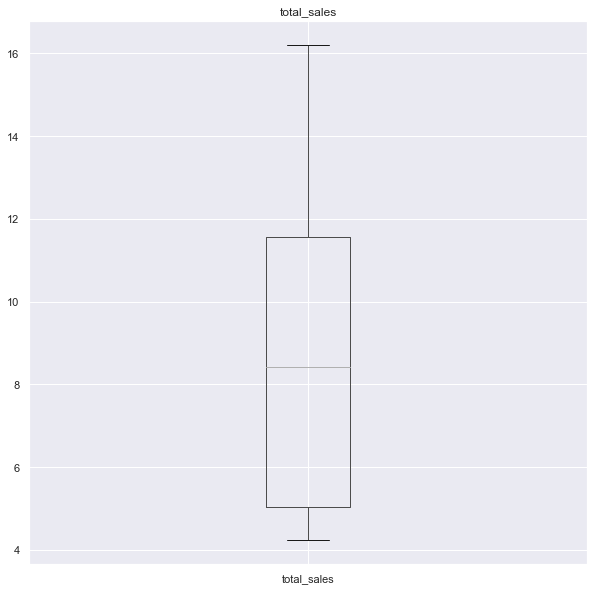



Размах продаж (total_sales) по платформе Wii:
Минимальное значение равно: 0.18
Среднее значение равно: 15.88
Максимальное значение равно: 59.88
Дисперсия равна: 526.81
Стандартное отклонение равно: 20.95
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


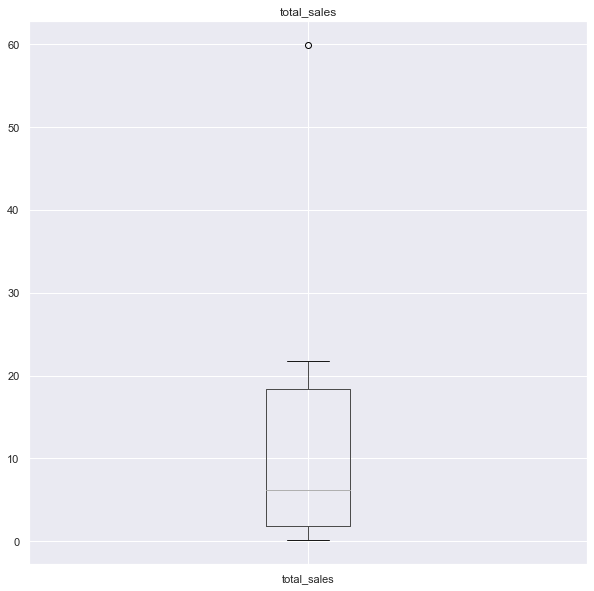



Размах продаж (total_sales) по платформе WiiU:
Минимальное значение равно: 4.60
Среднее значение равно: 16.44
Максимальное значение равно: 22.03
Дисперсия равна: 49.96
Стандартное отклонение равно: 6.32
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


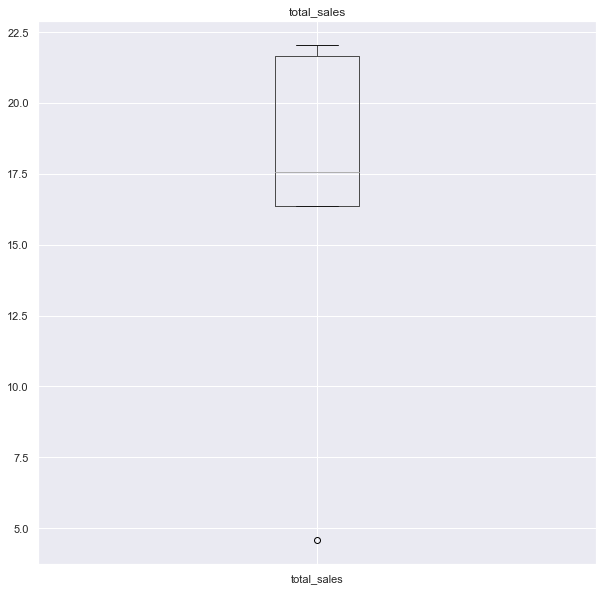



Размах продаж (total_sales) по платформе X360:
Минимальное значение равно: 1.52
Среднее значение равно: 63.80
Максимальное значение равно: 145.12
Дисперсия равна: 3201.79
Стандартное отклонение равно: 51.65
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


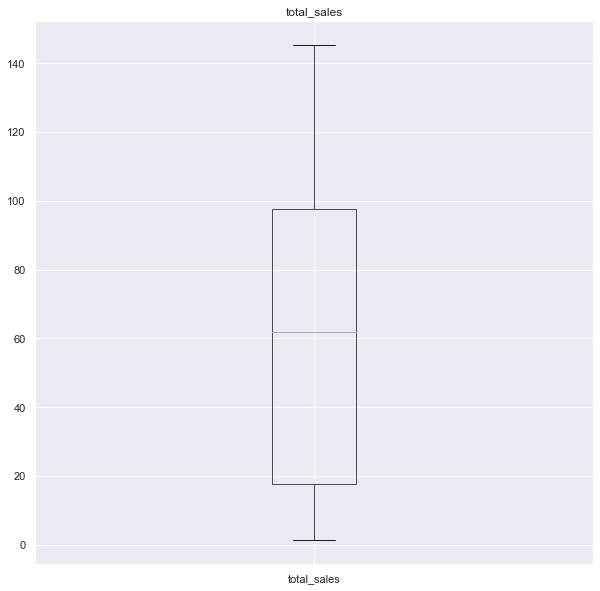



Размах продаж (total_sales) по платформе XOne:
Минимальное значение равно: 18.96
Среднее значение равно: 39.83
Максимальное значение равно: 60.14
Дисперсия равна: 412.66
Стандартное отклонение равно: 17.59
Разница между максимальным значением и средним не превышает 3 стандартных отклонений
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


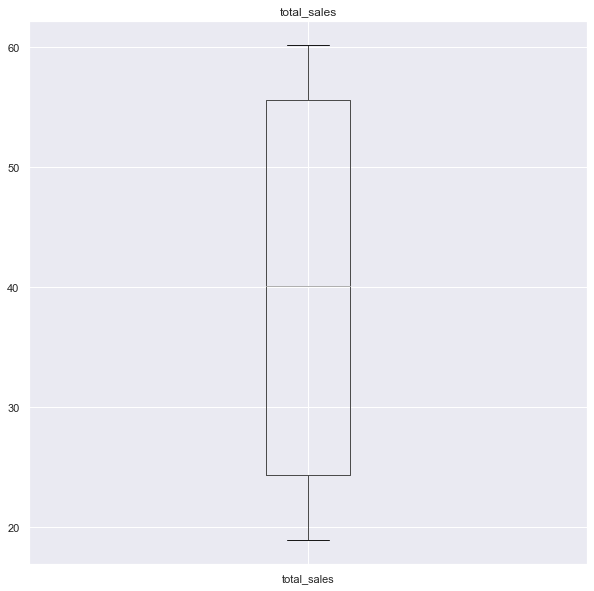

In [101]:
for name in platform_list:
    print ('Размах продаж (total_sales) по платформе '+ name + ':')
    boxplot_dis((new_games_pivot.loc[new_games_pivot['platform'] == name].total_sales), 'total_sales', new_games_pivot.loc[new_games_pivot['platform'] == name])
    print ('\n')

Из найденных описательных статистик, а также исходя из графиков, можно сделать вывод о том, что все продажи по платформам распределены нормально.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

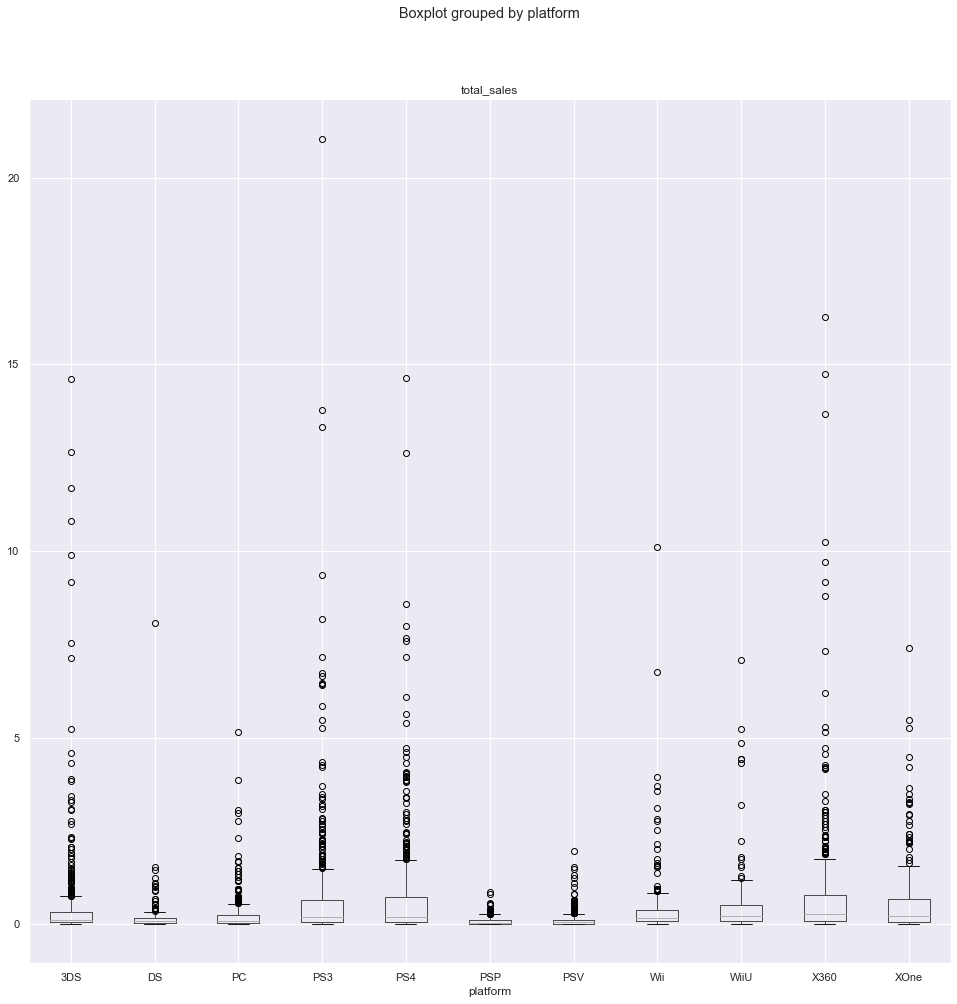

In [102]:
new_games.boxplot(column='total_sales',by='platform', figsize=(16, 16))

Добавив ограничение по оси y, увидим:

<function matplotlib.pyplot.show(close=None, block=None)>

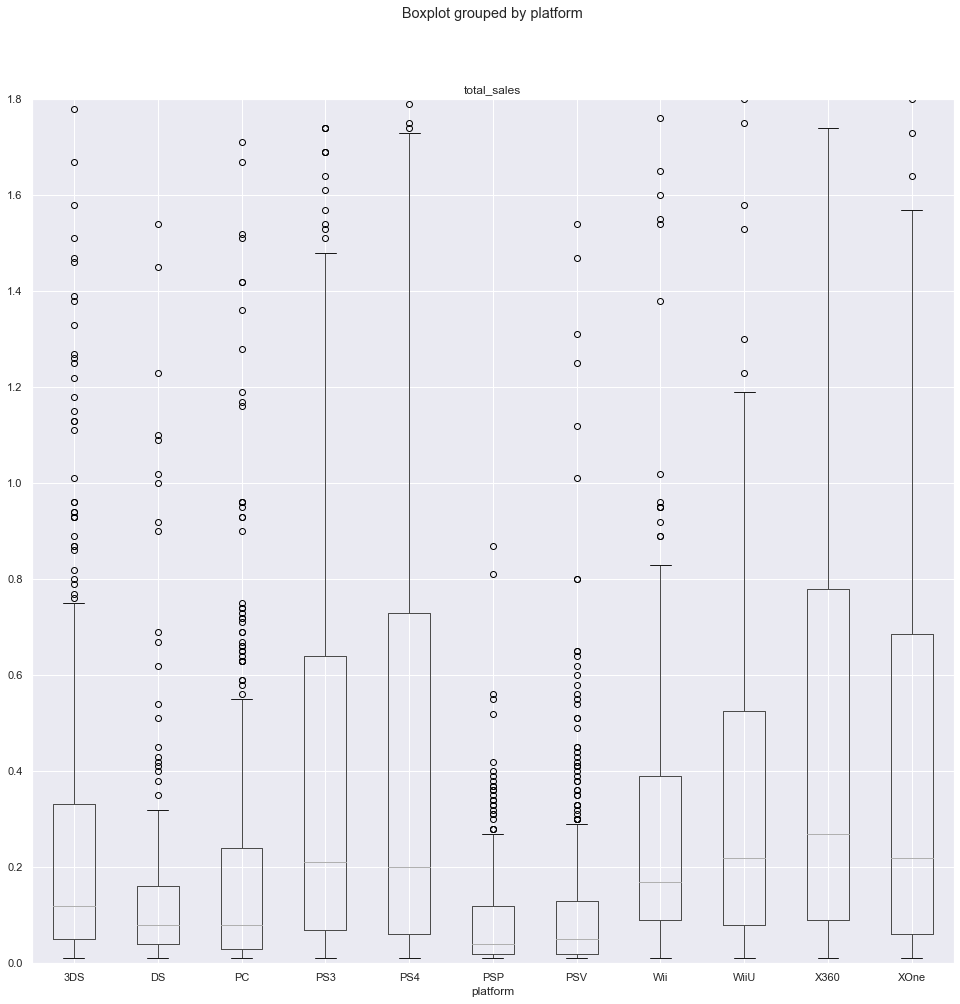

In [103]:
new_games.boxplot(column='total_sales',by='platform', figsize=(16, 16))
plt.ylim(0,1.8)
plt.show

Видим, что самое большое медианное значение у X360, также у самый большой размах, следующий за ним - PS4, PS3, XOne. Остальные платформы сгруппированы более компактно, и многие их "выбросы" не достигают даже межквартильных значений указанных выше платформ, не то что краев их "размаха". 

## Влияние отзывов пользователей и критиков на продажи игр внутри платформы PS3

Посмотрим, как влияют на продажи внутри самой популярной платформы (PS3) отзывы пользователей и критиков. 

In [104]:
ps3_sales=new_games.loc[new_games['platform']=="PS3"]
ps3_sales

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,-1.0,-1.0,UN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01


Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

_Отзывы критиков и продажи игры_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

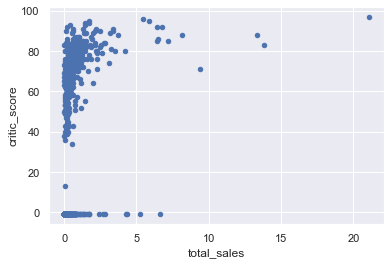

In [105]:
ps3_sales.loc[ps3_sales['critic_score'].notnull()].plot(x='total_sales', y='critic_score', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

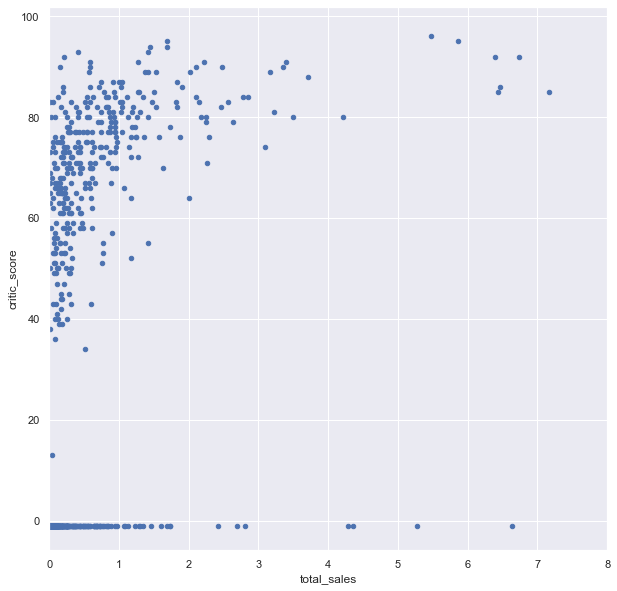

In [106]:
ps3_sales.loc[ps3_sales['critic_score'].notnull()].plot(x='total_sales', y='critic_score', kind='scatter', xlim=[0,8], figsize=(10, 10))

In [107]:
ps3_sales['total_sales'].corr(ps3_sales['critic_score'])

0.32403126880650646

Судя по диаграмме рассеивания, взаимосвязь между отзывами критиков и продажами есть, и положительная. Очевидно, что чем лучше отзывы, тем больше игр продается, чем больше игр продается, тем более игра популярна и больше отзывов. В то же время, на свете есть и малопопулярные игры, которые не получают большое количество высоких отзывов просто потому, что они не так популярны, и отзывы на них никто не пишет, однако это не касается исследуемой платформы: здесь не нашлось игр с большими продажами и маленьким рейтингом. Исходя из коэффициента корреляции эта взаимосвязь положительная, средней силы. 

_Отзывы пользователей и продажи игры_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

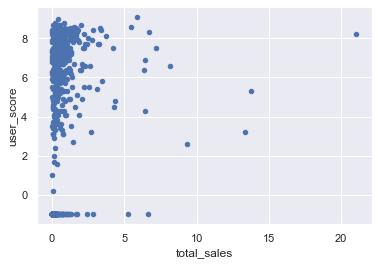

In [108]:
ps3_sales.loc[ps3_sales['user_score'].notnull()].plot(x='total_sales', y='user_score', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

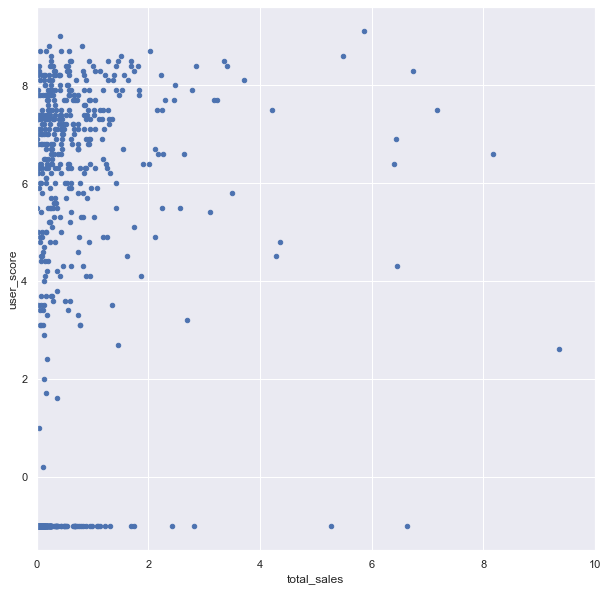

In [109]:
ps3_sales.loc[ps3_sales['user_score'].notnull()].plot(x='total_sales', y='user_score', kind='scatter', xlim=[0,10], figsize=(10, 10))

In [110]:
ps3_sales['total_sales'].corr(ps3_sales['user_score'])

0.2336035928005249

Судя по графику, взаимосвязь между пользовательскими отзывами есть, но мы видим гораздо большее рассеяние, а также наличие игр (точек) с большими продажами при значительно худших пользовательских отзывах, чем у других игр с меньшими продажами. Cудя по коэффициенту корреляции, эта связь неотрицательная, но ее степень совсем невелика, ее почти нет.

Возможно, это из-за природы отзывов и озвучиваемой популярности любого продукта (не только игр): на популярные и раскрученные продукты критиками пишутся хорошие отзывы (в том числе заказные, которые раскручивают эту самую популярность и т.д.). В то же время объемы продаж игр не сильно зависят от отзывов пользователей, в частности, потому, что многие пользователи, будучи довольными продуктом, не тратят время на написание отзывов, а просто пользуются продуктом (здесь также имеет значение то, как формируется пользовательский рейтинг: опрос какой-то выборки из пользователей или же "добровольное" пользовательской голосование, которое может быть менее объективным (см.причину выше). 

## Взаимосвязь отзывов пользователей и критиков с продажами игр на других платформах

Посмотрим, как обстоят дела на всех платформах вместе: есть ли взаимосвязь между отзывами и продажами, такая же ли она, как и на самой популярной платформе. 

In [111]:
not_null_score=new_games.loc[(new_games['critic_score'].notnull()) & (new_games['user_score'].notnull())]
not_null_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,UN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,UN,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01


_Продажи и отзывы критиков_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

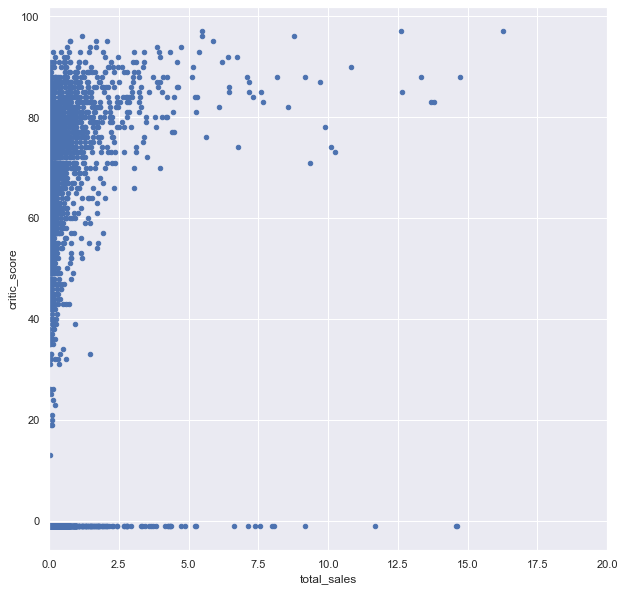

In [112]:
not_null_score.plot(x='total_sales', y='critic_score', kind='scatter', xlim=[0,20], figsize=(10, 10))

In [113]:
not_null_score['total_sales'].corr(not_null_score['critic_score'])

0.27302435884836795

На всех платформах мы видим, в целом, ту же картину, что и на отдельно рассматривавшейся ранее. Проверим теперь пользовательский рейтинг. 

_Продажи и пользовательский рейтинг_

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

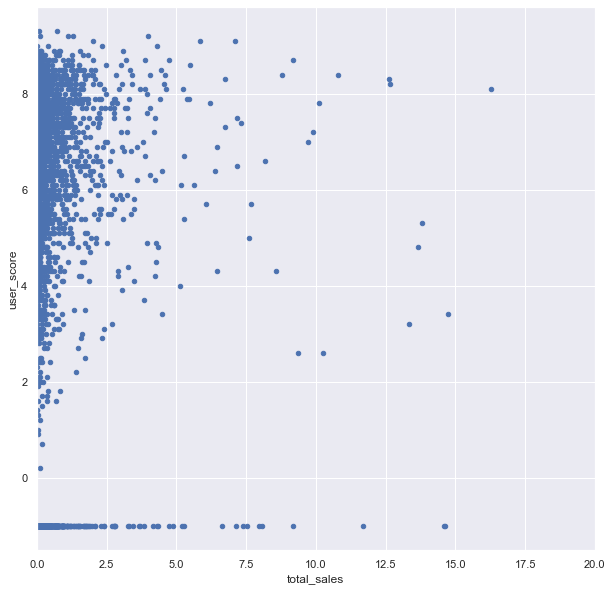

In [114]:
not_null_score.plot(x='total_sales', y='user_score', kind='scatter', xlim=[0,20], figsize=(10, 10))

In [115]:
not_null_score['total_sales'].corr(not_null_score['user_score'])

0.20757200413795512

Здесь мы видим также гораздо бОльшее рассеяние и практическое отсутствие взаимосвязи, как и в исследовании крупнейшей платформы. 

## Исследование игровых жанров

Посмотрите на общее распределение игр по жанрам, на то, какие из них наиболее прибыльные и как выделяются ли жанры с высокими и низкими продажами?

_Распределение игр по жанрам_

In [116]:
new_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,UN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,UN,14.60


In [117]:
genre_qty=new_games.pivot_table(index=['genre'], values='name', aggfunc='count').reset_index().sort_values(by='name', ascending=False)
genre_qty

,genre,name
0,Action,1276
7,Role-Playing,467
1,Adventure,409
10,Sports,388
3,Misc,375
8,Shooter,332
6,Racing,182
2,Fighting,158
9,Simulation,137
4,Platform,122


Минимальное значение равно: 71.00
Среднее значение равно: 336.17
Максимальное значение равно: 1276.00
Дисперсия равна: 106301.24
Стандартное отклонение равно: 312.16
Разница между максимальным значением и средним превышает 3 стандартных отклонения, что говорит о том, что у нас присутствуют выбросы в бОльшую сторону.
Разница между минимальным значением и средним не превышает 3 стандартных отклонений


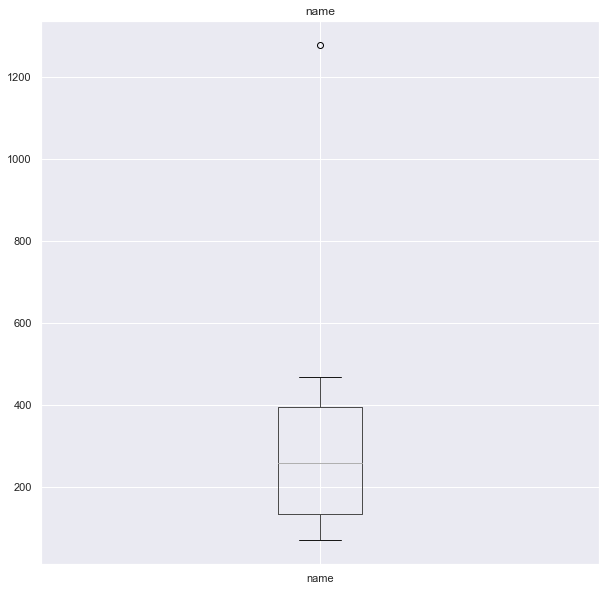

In [118]:
boxplot_dis(genre_qty.name, 'name', genre_qty)

Игр в жанре action (1-е место) продается почти в 18 раз больше, чем наименее продаваемых игр - puzzle. 

<AxesSubplot:xlabel='genre'>

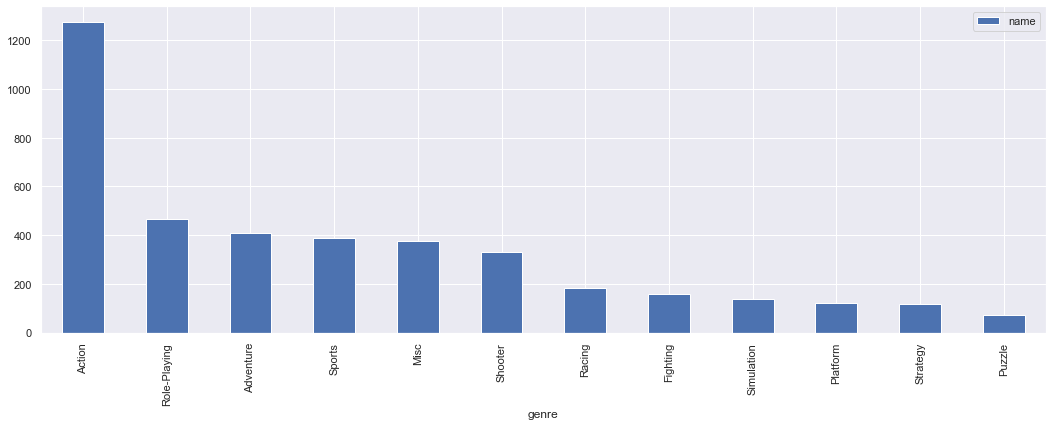

In [119]:
genre_qty.plot(kind='bar', y='name', x='genre', figsize=(18, 6))

Наибольшее количество игр - в жанре action, затем - РПГ, которых, однако, более, чем в 2.5 раза меньше. Проверим, являются ли игры в жанре action также наиболее прибыльными. 

_Прибыльность жанров_

In [120]:
genre_sales=new_games.pivot_table(index=['genre'], values='total_sales', aggfunc='mean').reset_index().sort_values(by='total_sales', ascending=False)
genre_sales

,genre,total_sales
8,Shooter,1.215090
4,Platform,0.726885
10,Sports,0.613222
7,Role-Playing,0.526210
6,Racing,0.485714
0,Action,0.438605
2,Fighting,0.422785
3,Misc,0.371787
9,Simulation,0.367591
11,Strategy,0.189402


По среднему количеству продаж лидируют вовсе не action, а "стрелялки" (shooter), результат которых в продажах копий на единицу игры почти в три раза лучше. 

# 4. Портрет пользователя каждого региона

Определим для пользователя из каждого региона (NA, EU, JP) самые популярные платформы (топ-5), самые популярные жанры (топ-5) и посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе. 

In [121]:
new_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,UN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,UN,14.60


In [122]:
new_games.na_sales.sum()

831.7600000000002

In [123]:
new_games.eu_sales.sum()

670.8100000000001

In [124]:
new_games.jp_sales.sum()

245.71

Больше всего продаж (в млн.копий) - в регионе NA, затем в EU, и в JP менее всего. 

## Регион NA

_Платформы_

In [125]:
new_games_na_pivot=new_games.pivot_table(index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
new_games_na_pivot['share']=(new_games_na_pivot['na_sales']/(new_games_na_pivot['na_sales'].sum()))
new_games_na_pivot.head()

,platform,na_sales,share
9,X360,228.25,0.274418
3,PS3,168.27,0.202306
4,PS4,108.74,0.130735
10,XOne,93.12,0.111955
0,3DS,82.65,0.099368


Получим список из 5 самых популярных платформ в этом регионе:

In [126]:
top_5_na = new_games_na_pivot.head().platform.tolist()
top_5_na

['X360', 'PS3', 'PS4', 'XOne', '3DS']

In [127]:
print ('Продажи на топ-5 платформах в этом регионе составляют от общих продаж: {:.2%}'.format(new_games_na_pivot.head().na_sales.sum() / new_games_na_pivot.na_sales.sum()))

Продажи на топ-5 платформах в этом регионе составляют от общих продаж: 81.88%


При этом видим, что около трети всех игр продается на одной платформе: X360, продажи на которой чуть менее, чем втрое больше, чем на платформе, замыкающей топ-5. 

_Жанры_

In [128]:
new_games_na_genre_pivot=new_games.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
new_games_na_genre_pivot['share']=(new_games_na_genre_pivot['na_sales']/(new_games_na_genre_pivot['na_sales'].sum()))
new_games_na_genre_pivot.head()

,genre,na_sales,share
0,Action,231.88,0.278782
8,Shooter,194.81,0.234214
10,Sports,109.31,0.131420
7,Role-Playing,83.78,0.100726
3,Misc,69.69,0.083786


In [129]:
top_5_genre_na = new_games_na_genre_pivot.head().genre.tolist()
top_5_genre_na

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']

In [130]:
print ('Продажи игр из топ-5 жанров в этом регионе составляют от общих продаж: {:.2%}'.format(new_games_na_genre_pivot.head().na_sales.sum() / new_games_na_genre_pivot.na_sales.sum()))

Продажи игр из топ-5 жанров в этом регионе составляют от общих продаж: 82.89%


Здесь два основных жанра - Action и Shooter, вместе более половины продаж. 

_Рейтинг ESRB_

In [131]:
new_games_na_rating_pivot=new_games.loc[new_games['rating'].notnull()].pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False)
new_games_na_rating_pivot['share']=new_games_na_rating_pivot['na_sales']/(new_games_na_rating_pivot['na_sales'].sum())
new_games_na_rating_pivot

,rating,na_sales,share
3,M,308.76,0.371213
0,E,170.33,0.204783
6,UN,123.83,0.148877
1,E10+,118.49,0.142457
5,T,109.93,0.132166
2,EC,0.42,0.000505
4,RP,0.00,0.000000


Расшифровка рейтинга следующая :
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older»)
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- __"UN" ("Undefined") - Категория, которую мы ввели - рейтинг не определен, данные по нему отсутствуют.__ 

43% продаж игр в этом регионе - из категории "для взрослых", далее - "для всех" и __"игры с неопределенным рейтингом"__

Добавив при обработке данных категорию игр, рейтинг которых не определен, видим, что в регионе NA они занимают 3-е место, это почти 7-я часть продаж.

## Регион EU

_Платформы_

In [132]:
new_games_eu_pivot=new_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
new_games_eu_pivot['share']=(new_games_eu_pivot['eu_sales']/(new_games_eu_pivot['eu_sales'].sum()))
new_games_eu_pivot.head()

,platform,eu_sales,share
3,PS3,163.10,0.243139
4,PS4,141.09,0.210328
9,X360,117.82,0.175638
0,3DS,61.27,0.091337
2,PC,57.12,0.085151


Получим список 5 самых популярных платформ.

In [133]:
top_5_eu = new_games_eu_pivot.head().platform.tolist()
top_5_eu

['PS3', 'PS4', 'X360', '3DS', 'PC']

In [134]:
print ('Продажи на топ-5 платформах в этом регионе составляют от общих продаж: {:.2%}'.format(new_games_eu_pivot.head().eu_sales.sum() / new_games_eu_pivot.eu_sales.sum()))

Продажи на топ-5 платформах в этом регионе составляют от общих продаж: 80.56%


На этом рынке первой платформе в топ-5 достается чуть менее четверти всех продаж, и ее продажи также чуть менее, чем в три раза выше, чем на платформе, замыкающей топ-5. 

_Жанры_

In [135]:
new_games_eu_genre_pivot=new_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
new_games_eu_genre_pivot['share']=(new_games_eu_genre_pivot['eu_sales']/(new_games_eu_genre_pivot['eu_sales'].sum()))
new_games_eu_genre_pivot.head()

,genre,eu_sales,share
0,Action,199.90,0.297998
8,Shooter,148.07,0.220733
10,Sports,88.64,0.132139
7,Role-Playing,62.30,0.092873
6,Racing,40.65,0.060598


In [136]:
top_5_genre_eu = new_games_eu_genre_pivot.head().genre.tolist()
top_5_genre_eu

['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']

In [137]:
print ('Продажи игр из топ-5 жанров в этом регионе составляют от общих продаж: {:.2%}'.format(new_games_eu_genre_pivot.head().eu_sales.sum() / new_games_eu_genre_pivot.eu_sales.sum()))

Продажи игр из топ-5 жанров в этом регионе составляют от общих продаж: 80.43%


Action, Shooter и Sports лидидируют, вместе это более 50% продаж. 

_Рейтинг ESRB_

In [138]:
new_games_eu_rating_pivot=new_games.loc[new_games['rating'].notnull()].pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False)
new_games_eu_rating_pivot['share']=new_games_eu_rating_pivot['eu_sales']/(new_games_eu_rating_pivot['eu_sales'].sum())
new_games_eu_rating_pivot

,rating,eu_sales,share
3,M,250.56,0.373519
0,E,141.70,0.211237
6,UN,116.64,0.173879
5,T,83.37,0.124283
1,E10+,78.51,0.117038
4,RP,0.03,0.000045
2,EC,0.00,0.000000


Расшифровка рейтинга следующая :
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older»)
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- __"UN" ("Undefined") - Категория, которую мы ввели - рейтинг не определен, данные по нему отсутствуют. __

В этом регионе первые две строчки такие же, как в регионе NA, доля игр "для взрослых" даже несколько больше, чем в NA. __На третьем месте также игры, рейтинг которых не определен__

## Регион JP

_Платформы_

In [139]:
new_games_jp_pivot=new_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
new_games_jp_pivot['share']=(new_games_jp_pivot['jp_sales']/(new_games_jp_pivot['jp_sales'].sum()))
new_games_jp_pivot.head()

,platform,jp_sales,share
0,3DS,100.62,0.409507
3,PS3,49.40,0.201050
5,PSP,24.04,0.097839
6,PSV,21.84,0.088885
4,PS4,15.96,0.064955


In [140]:
top_5_jp = new_games_jp_pivot.head().platform.tolist()
top_5_jp

['3DS', 'PS3', 'PSP', 'PSV', 'PS4']

In [141]:
print ('Продажи на топ-5 платформах в этом регионе составляют от общих продаж: {:.2%}'.format(new_games_jp_pivot.head().jp_sales.sum() / new_games_jp_pivot.jp_sales.sum()))

Продажи на топ-5 платформах в этом регионе составляют от общих продаж: 86.22%


Здесь доля одной платформы 3DS - 41%, следующая платформа в топ-5 имеет продажи в два раза меньше, а замыкающая топ-5 платформа почти в 16 раз меньше. Здесь рынок (по платформам) разделен намного существеннее, чем предыдущие два. 

_Жанры_

In [142]:
new_games_jp_genre_pivot=new_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
new_games_jp_genre_pivot['share']=(new_games_jp_genre_pivot['jp_sales']/(new_games_jp_genre_pivot['jp_sales'].sum()))
new_games_jp_genre_pivot.head()

,genre,jp_sales,share
7,Role-Playing,79.98,0.325506
0,Action,63.56,0.258679
3,Misc,17.60,0.071629
2,Fighting,12.38,0.050385
4,Platform,12.13,0.049367


In [143]:
top_5_genre_jp = new_games_jp_genre_pivot.head().genre.tolist()
top_5_genre_jp

['Role-Playing', 'Action', 'Misc', 'Fighting', 'Platform']

In [144]:
print ('Продажи игр из топ-5 жанров в этом регионе составляют от общих продаж: {:.2%}'.format(new_games_jp_genre_pivot.head().jp_sales.sum() / new_games_jp_genre_pivot.jp_sales.sum()))

Продажи игр из топ-5 жанров в этом регионе составляют от общих продаж: 75.56%


РПГ и Action вместе достается более половины продаж, остальные идущие за ними жанры - уже каждый втрое меньше. 

_Рейтинг ESRB_

In [145]:
new_games_jp_rating_pivot=new_games.loc[new_games['rating'].notnull()].pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)
new_games_jp_rating_pivot['share']=new_games_jp_rating_pivot['jp_sales']/(new_games_jp_rating_pivot['jp_sales'].sum())
new_games_jp_rating_pivot

,rating,jp_sales,share
6,UN,138.29,0.562818
0,E,36.62,0.149037
5,T,33.43,0.136055
3,M,26.14,0.106386
1,E10+,11.23,0.045704
2,EC,0.00,0.000000
4,RP,0.00,0.000000


Расшифровка рейтинга следующая :
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older»)
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
- __"UN" ("Undefined") - Категория, которую мы ввели - рейтинг не определен, данные по нему отсутствуют.__

В регионе JP игры категории "для взрослых" занимают только 4-ю строчку, на втором и третьем месте - "для всех" и "подросткам". __На первом месте игры с неопределенным рейтингом.__ 

In [146]:
un_games=new_games.loc[(new_games['rating']=="UN") & (new_games['jp_sales'] != 0)]
un_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,UN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,UN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,UN,11.68
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,-1.0,-1.0,UN,9.18
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,-1.0,-1.0,UN,8.06
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,UN,0.01


In [147]:
un_games.pivot_table(index='genre', values='name', aggfunc='count').reset_index().sort_values(by='name', ascending=False)

,genre,name
0,Action,379
1,Adventure,254
7,Role-Playing,236
3,Misc,115
10,Sports,57
11,Strategy,45
2,Fighting,41
9,Simulation,25
8,Shooter,18
6,Racing,12


In [148]:
un_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False)

,genre,jp_sales
7,Role-Playing,55.78
0,Action,34.26
3,Misc,11.84
1,Adventure,10.46
10,Sports,6.68
2,Fighting,6.61
11,Strategy,4.41
9,Simulation,4.02
5,Puzzle,1.96
8,Shooter,1.18


Если посмотреть на игры без рейтинга, имеющие продажи в регионе JP, то лидерами по количеству продаж здесь являются РГП, Action. Возможно, так много продаваемых в регионе JP игр имеют рейтинг, не определенный ESRB, потому что имеют местный рейтинг, CERO, наличие которого контролируется более строго, как и местное законодательств в области продажи игр несовершеннолетним.

_Выводы_

Мы видим, что на всех рынках 80-86% продаж игр происходит на топ-5 платформах, причем на самой первой существенно больше, чем на всех остальных. На каждом рынке лидирует своя платформа, но три из них входит в топ-5 на всех рынках: PS3 (также лидер на рынке EU, на двух других занимает второе место), PS4, 3DS.

На всех рынках 75-80% продаж - это игры из топ-5 жанров, причем около трети продаж - игры лидирующего жанра. На рынках NA, EU лидирует Action. Топ-5 на рынке JP  отличается от топ-5 на рынках NA, EU, где (кроме последней позиции) топ-5 совпадает. На рынке JP лидируют РПГ, которые на двух других рынках занимают только 4-е место. 

Рейтинг ESRB однороден на рынках NA и EU, и отличается на рынке JP, который и по этому параметру особенный. 

# 5. Проверка гипотез

Задайте самостоятельно пороговое значение alpha.

## Гипотеза о том, что средние пользовательские рейтинги платформ Xbox One (XOne) и PC одинаковые

In [149]:
games.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Для корректной проверки гипотез исключим данные с "заглушкой" (-1)

In [150]:
not_null_rating=new_games.loc[new_games['user_score'] != -1]
not_null_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


Проверим гипотезу о том, что средний пользовательский рейтинг платформы XOne не отличается от среднего пользовательского рейтинга платформы PC. Сформулируем нулевую гипотезу как "средний пользовательский рейтинг платформы XOne равен среднему пользовательскому рейтингe платформы PC". Альтернативная гипотеза: "не равен". 

Средний пользовательский рейтинг XOne

In [151]:
not_null_rating.loc[new_games['platform'] == "XOne"].user_score.mean()

6.52142857142857

Средний пользовательский рейтинг PC

In [152]:
not_null_rating.loc[new_games['platform'] == "PC"].user_score.mean()

6.46967741935484

Как видим, они очень близки, но проверим гипотезы. 

In [153]:
alpha = 0.05
results = st.ttest_ind(not_null_rating.loc[not_null_rating['platform'] == "XOne"].user_score, not_null_rating.loc[not_null_rating['platform'] == "PC"].user_score, equal_var=True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Мы отвергаем гипотезу о равенстве рейтингов XOne и PC')
else:
    print('У нас не получилось отвергнуть нулевую гипотезу о равенстве рейтингов XOne и PC') 

p-значение: 0.7177006788881487
У нас не получилось отвергнуть нулевую гипотезу о равенстве рейтингов XOne и PC


Исходя из наших расчетов средние пользовательские рейтинги XOne, PC действительно не отличаются. 

## Гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные

In [154]:
not_null_rating.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68


Проверим гипотезу о том, что средний пользовательский рейтинг жанра Action отличается от среднего пользовательского рейтинга жанра Sports. Сформулируем нулевую гипотезу как "средний пользовательский рейтинг Action равен среднему пользовательскому рейтингy Sports". Альтернативная гипотеза: "не равен".

Средний пользовательский рейтинг Action:

In [155]:
not_null_rating.loc[new_games['genre'] == "Action"].user_score.mean()

6.779610194902563

Средний пользовательский рейтинг Sports:

In [156]:
not_null_rating.loc[new_games['genre'] == "Sports"].user_score.mean()

5.6587044534412945

Визуально эти два рейтинга различны, но проверим, так ли это. 

In [157]:
alpha = 0.05
results = st.ttest_ind(not_null_rating.loc[not_null_rating['genre'] == "Action"].user_score, not_null_rating.loc[not_null_rating['genre'] == "Sports"].user_score, equal_var=True)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Мы отвергаем гипотезу о равенстве рейтингов Action и Sports')
else:
    print('У нас не получилось отвергнуть нулевую гипотезу о равенстве рейтингов Action и Sports') 

p-значение: 6.177377329197274e-24
Мы отвергаем гипотезу о равенстве рейтингов Action и Sports


Мы можем отвергнуть гипотезу о равенстве рейтингов и принять гипотезу о том, что они разные. 

# Общий вывод

Мы проанализировали имеющиеся у нас данные о продаже компьютерных игр, отделив данные за актуальный период, основанный на найденном нами цикле популярности игровых платформ. 

В поисках критериев, отделяющих более успешные с точки зрения продаж компьютерные игры от менее успешных, мы обнаружили, что: 
- продажи игр за последние годы испытывают падение, даже на популярных платформах
- игры Action, хотя их и продается бОльшее количество, не такие успешные с точки зрения продаж как Shooter, 
- хорошие отзывы критиков не особенно влияют на продаваемость игр, 
- рынки регионов NA и EU весьма схожи, там лидирует Action и более успешный с точки зрения продаж Shooter (игры "для взрослых"), а рынок JP от них отличается (проигрывает им по доле общих продаж, но также имеет интерес к Action), поэтому с рынками NA и EU можно работать схожим образом, а на рынке JP - по-другому, в соответствии со сделанными выводами в отношении популярных платформ и жанров игр. 